**For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.**

**Read the data as an appropriate Time Series data and plot the data.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df1 = pd.read_csv('Sparkling.csv',parse_dates=['YearMonth'],index_col='YearMonth')


In [3]:
df1.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [5]:
df1.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

In [6]:
df1.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

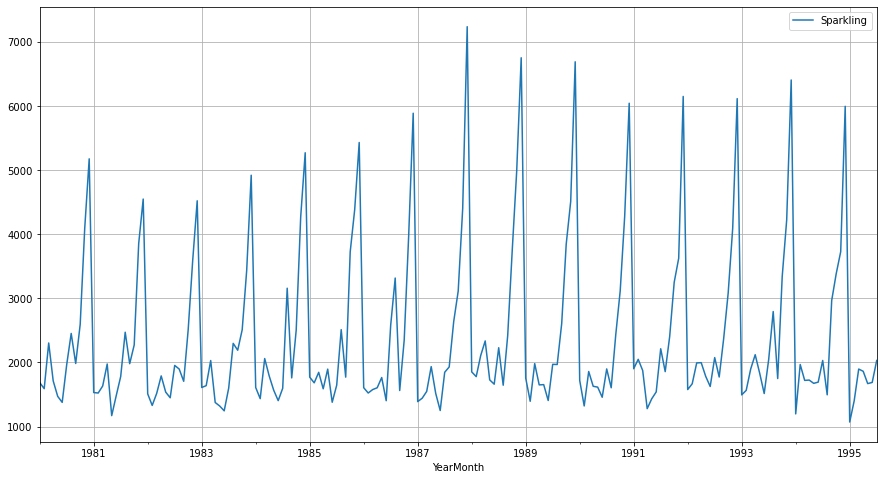

In [8]:
df1.plot()
plt.grid();

In [9]:
df1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [10]:
df1['Sparkling'].isna().sum()

0

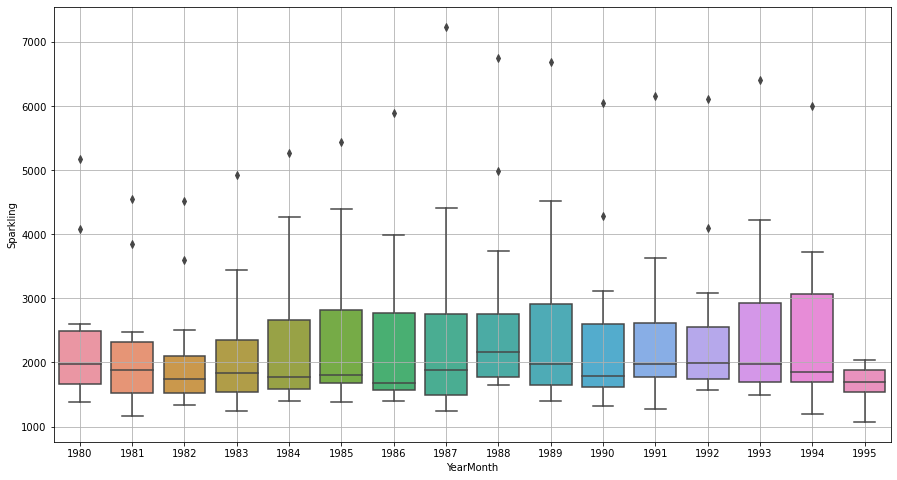

In [11]:
sns.boxplot(x = df1.index.year,y = df1['Sparkling'])
plt.grid();

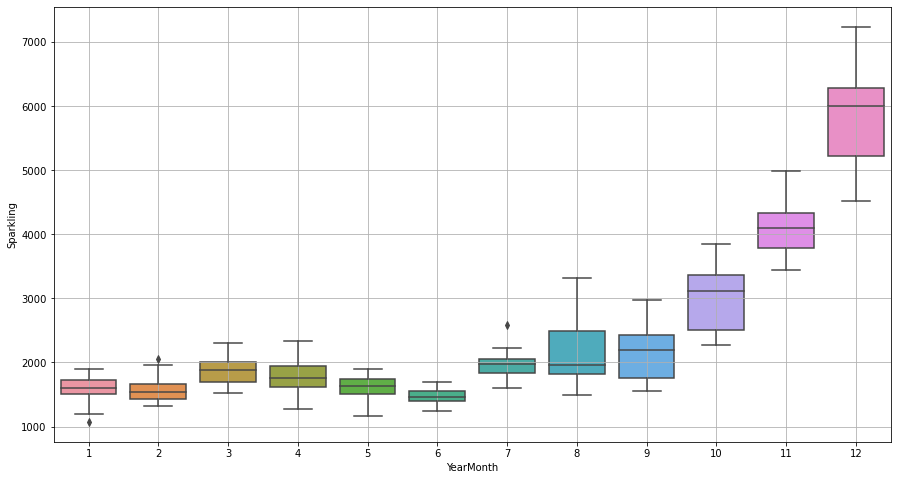

In [12]:
sns.boxplot(x = df1.index.month,y = df1['Sparkling'])
plt.grid();

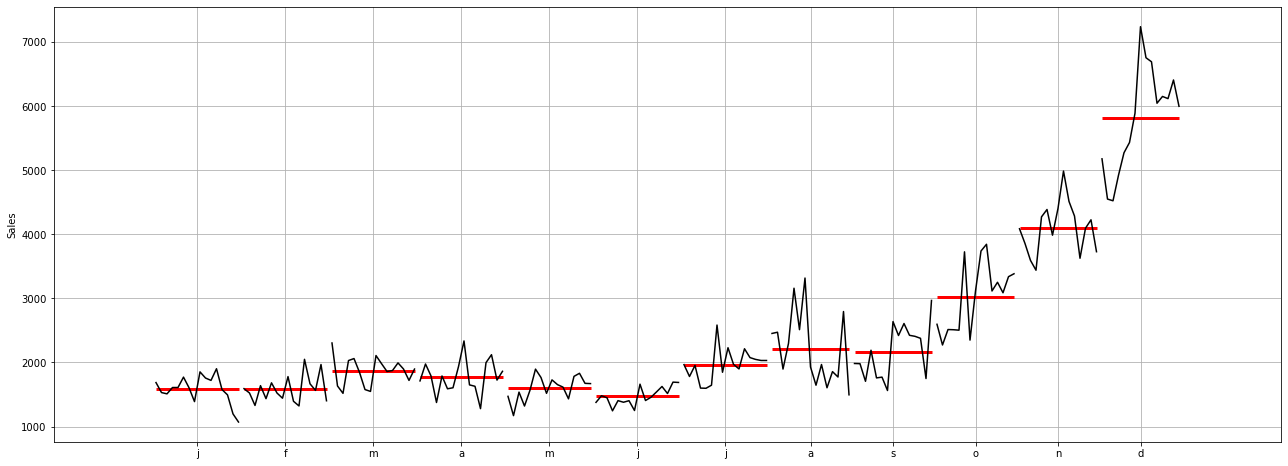

In [13]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df1,ylabel='Sales',ax=ax)
plt.grid();

In [14]:
monthly_sales_sparkling = pd.pivot_table(df1, values = 'Sparkling', columns = df1.index.month_name(), index = df1.index.year)
monthly_sales_sparkling

YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

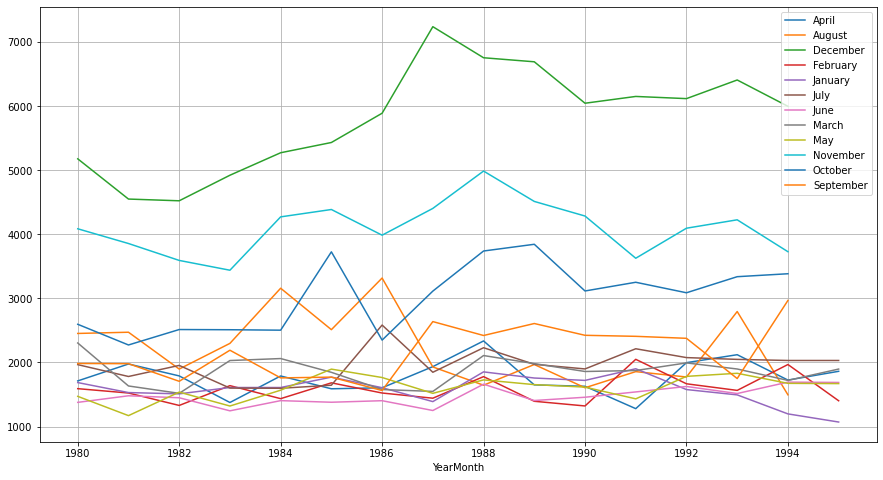

In [15]:
monthly_sales_sparkling.plot()
plt.grid()
plt.legend(loc='best');

In [16]:
df1_yearly_sum = df1.resample('A').sum()
df1_yearly_sum.head()

Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

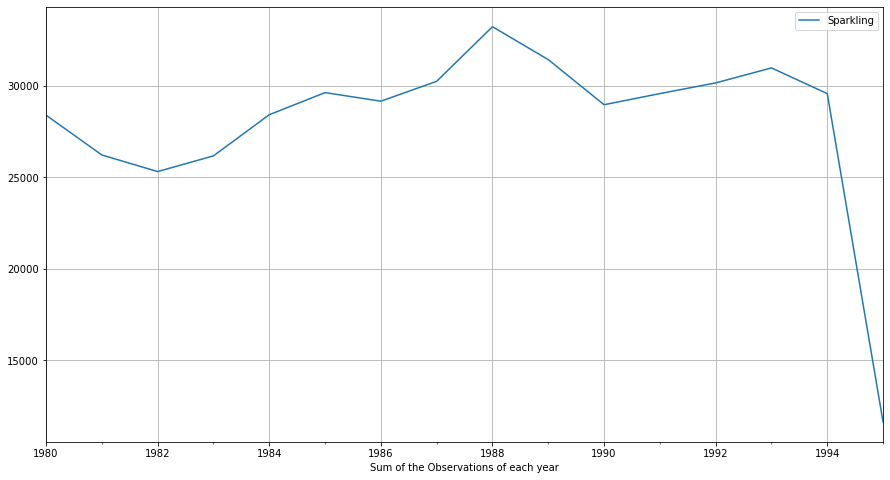

In [17]:
df1_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [18]:
df1_yearly_mean = df1.resample('Y').mean()
df1_yearly_mean.head()

Sparkling
YearMonth              
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

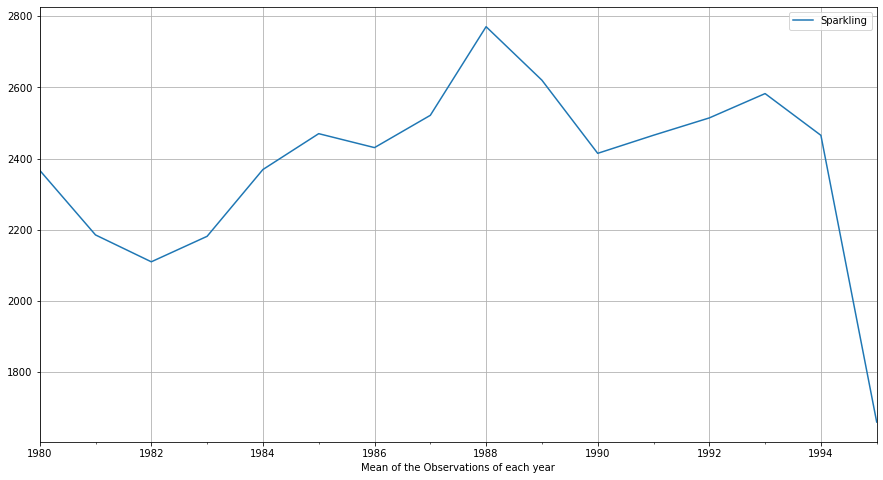

In [19]:
df1_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

In [20]:
df1_quarterly_sum = df1.resample('Q').sum()
df1_quarterly_sum.head()

Sparkling
YearMonth            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

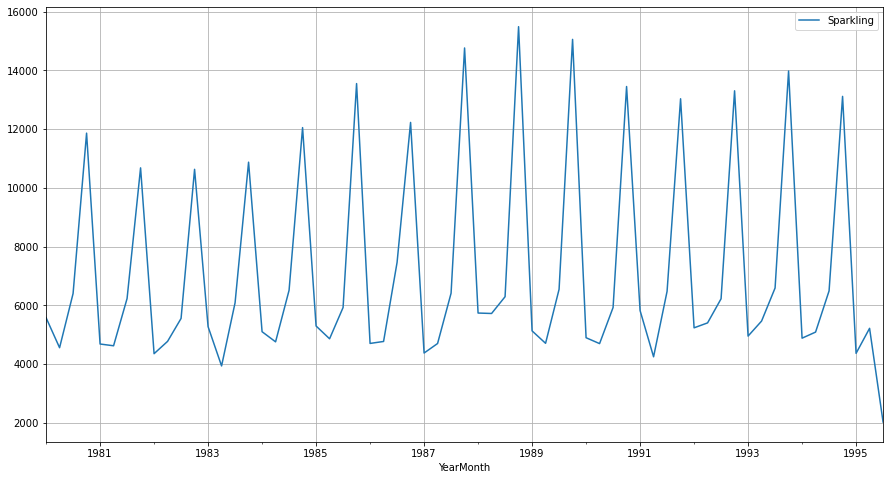

In [21]:
df1_quarterly_sum.plot();
plt.grid()

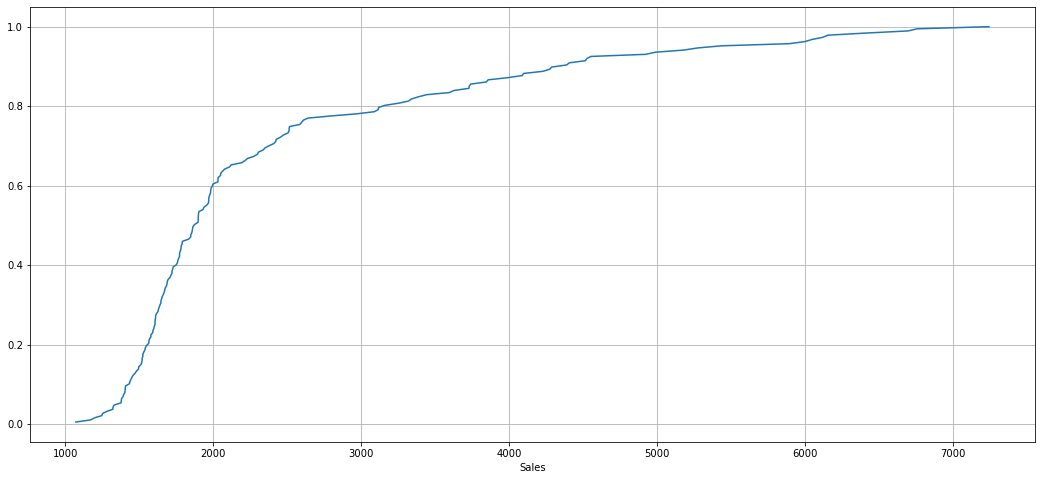

In [22]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df1['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

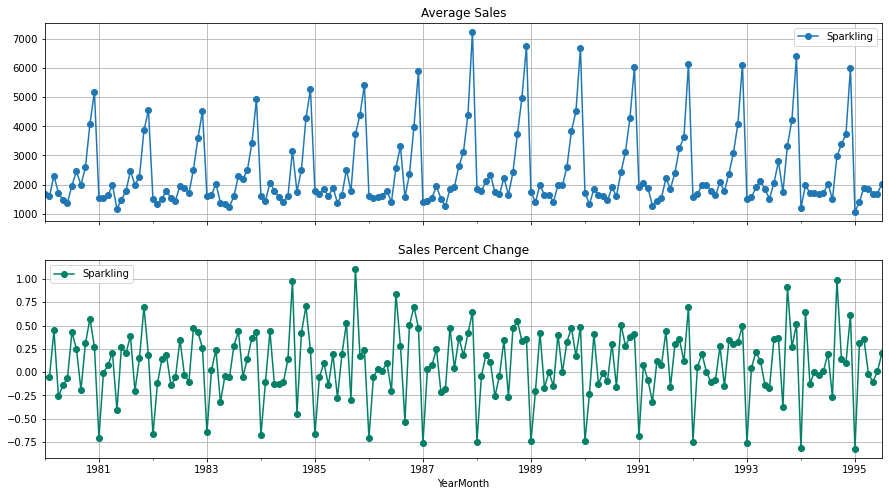

In [23]:
# group by date and get average Sales, and precent change
average    = df1.groupby(df1.index)["Sparkling"].mean()
pct_change = df1.groupby(df1.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

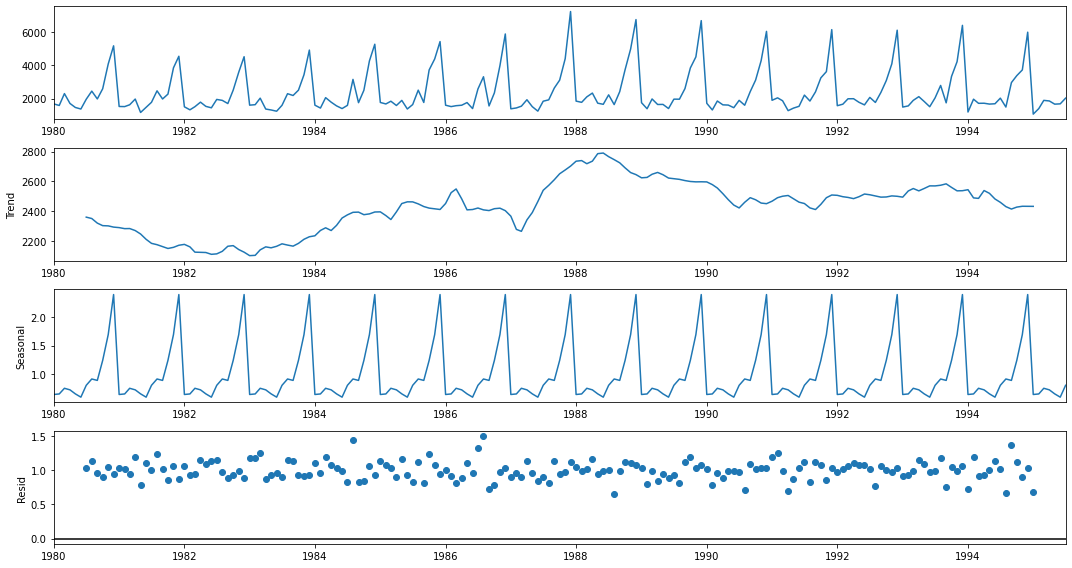

In [25]:
decomposition = seasonal_decompose(df1,model='multiplicative')
decomposition.plot();

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [27]:
residual.mean()

0.9997456359115033

C:\Users\siva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


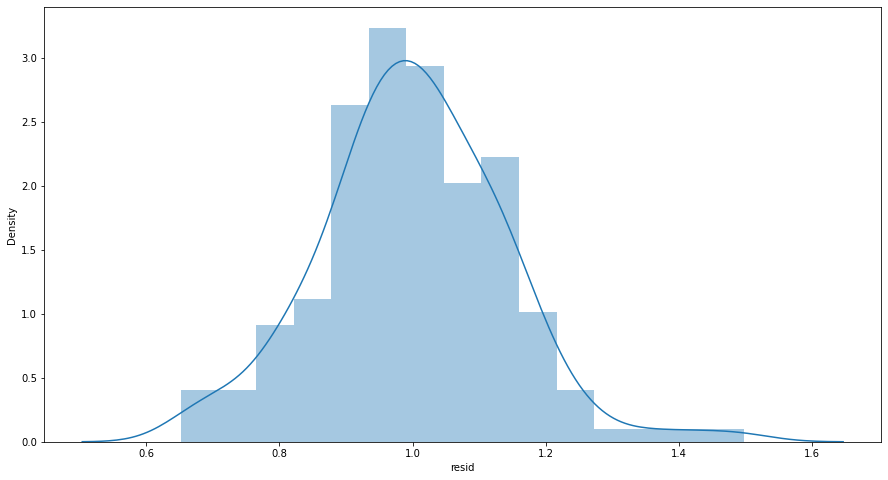

In [28]:
sns.distplot(residual);

In [29]:
from scipy import stats

In [30]:
stats.shapiro(residual.dropna())

ShapiroResult(statistic=0.9859988689422607, pvalue=0.07802142202854156)

**The seasonality is multiplicative as the residue is normally distributed**

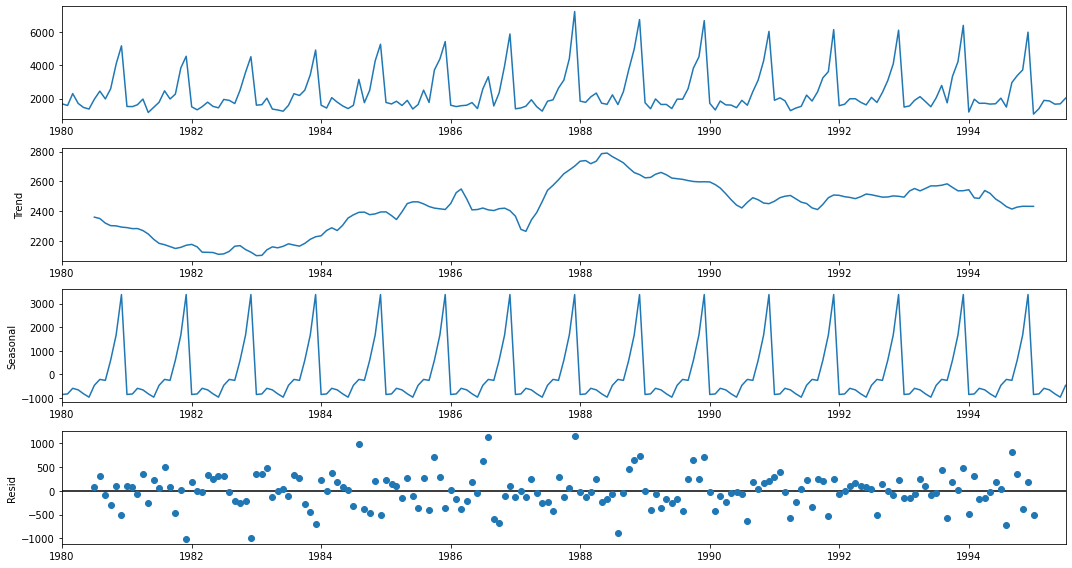

In [31]:
decomposition = seasonal_decompose(df1,model='additive')
decomposition.plot();

In [32]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [33]:
residual.mean()

-1.2088458994707487

C:\Users\siva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


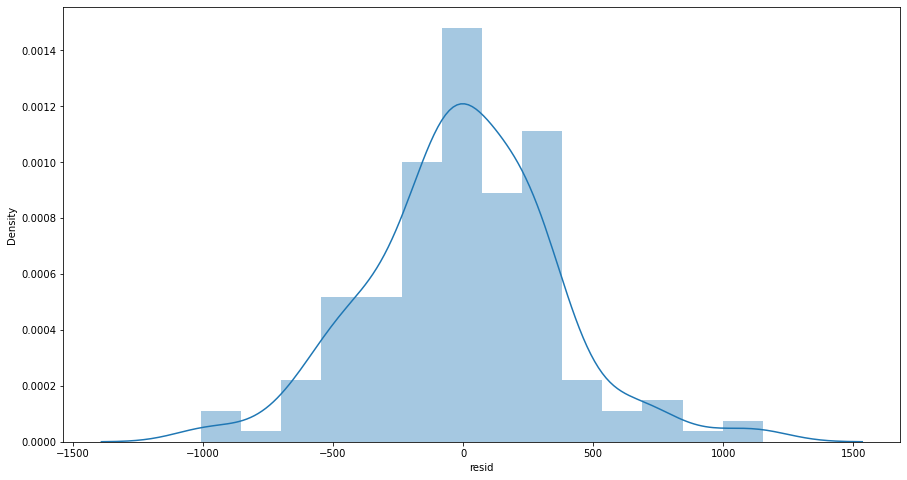

In [34]:
sns.distplot(residual);

In [35]:
stats.shapiro(residual.dropna())

ShapiroResult(statistic=0.9833053350448608, pvalue=0.0343334935605526)

** The seasonality is not additive as the residue is not normally distributed**

**Split the data into train and test and plot the training and test data.**

In [36]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [37]:
from IPython.display import display

In [38]:
train_sparkling=df1[df1.index.year < 1991]
test_sparkling=df1[df1.index.year >= 1991]

In [39]:
print('First few rows of Training Data')
display(train_sparkling.head())
print('Last few rows of Training Data')
display(train_sparkling.tail())
print('First few rows of Test Data')
display(test_sparkling.head())
print('Last few rows of Test Data')
display(test_sparkling.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [40]:
print(train_sparkling.shape)
print(test_sparkling.shape)

(132, 1)
(55, 1)


## Model 1: Linear Regression

In [41]:
LinearRegression_train = train_sparkling.copy()
LinearRegression_test = test_sparkling.copy()

In [42]:
len(df1)

187

In [43]:
range(len(train_sparkling))

range(0, 132)

In [44]:
range(len(test_sparkling))

range(0, 55)

In [45]:
train_time = [i+1 for i in range(len(train_sparkling))]
test_time = [i+133 for i in range(len(test_sparkling))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [46]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

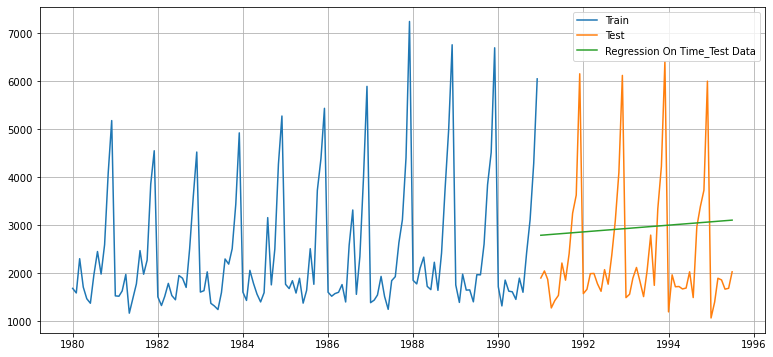

In [50]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [51]:
from sklearn import metrics

In [52]:
metrics.mean_absolute_error(test_sparkling['Sparkling'],test_predictions_model1)

1203.2393865396568

In [53]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test_sparkling['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [54]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1389.135175

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [55]:
NaiveModel_train = train_sparkling.copy()
NaiveModel_test = test_sparkling.copy()

In [56]:
NaiveModel_test['naive'] = np.asarray(train_sparkling['Sparkling'])[len(np.asarray(train_sparkling['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

In [57]:
NaiveModel_train.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [58]:
NaiveModel_test.head()

Sparkling  naive
YearMonth                   
1991-01-01       1902   6047
1991-02-01       2049   6047
1991-03-01       1874   6047
1991-04-01       1279   6047
1991-05-01       1432   6047

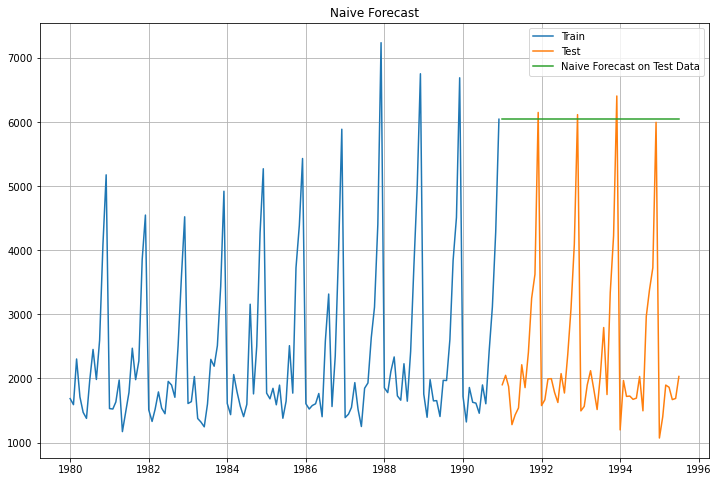

In [59]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [60]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test_sparkling['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [61]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

## Method 3: Simple Average

In [62]:
SimpleAverage_train = train_sparkling.copy()
SimpleAverage_test = test_sparkling.copy()

In [63]:
SimpleAverage_test['mean_forecast'] = train_sparkling['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

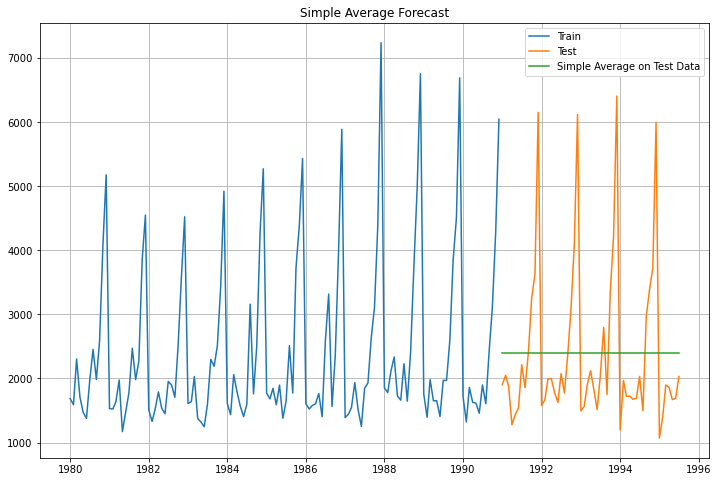

In [64]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [65]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test_sparkling['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [66]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

## Method 4: Moving Average(MA)

In [67]:
MovingAverage = df1.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [68]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head(10)

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
1980-06-01       1377      1424.0     1716.00  1690.166667          NaN
1980-07-01       1966      1671.5     1631.50  1736.833333          NaN
1980-08-01       2453      2209.5     1816.75  1880.500000          NaN
1980-09-01       1984      2218.5     1945.00  1827.166667  1838.222222
1980-10-01       2596      2290.0     2249.75  1974.500000  1939.333333

In [69]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

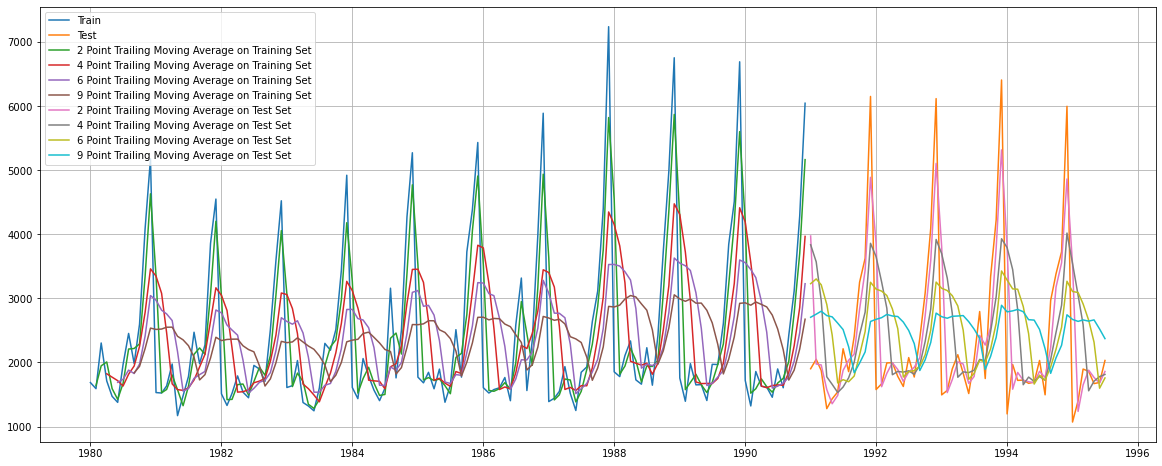

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [71]:
trailing_MovingAverage_test.head()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1991-01-01       1902      3974.5     3837.75  3230.000000  2705.666667
1991-02-01       2049      1975.5     3571.00  3304.000000  2753.888889
1991-03-01       1874      1961.5     2968.00  3212.333333  2800.222222
1991-04-01       1279      1576.5     1776.00  2906.166667  2731.333333
1991-05-01       1432      1355.5     1658.50  2430.500000  2712.111111

In [72]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test_sparkling['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test_sparkling['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test_sparkling['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test_sparkling['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [73]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

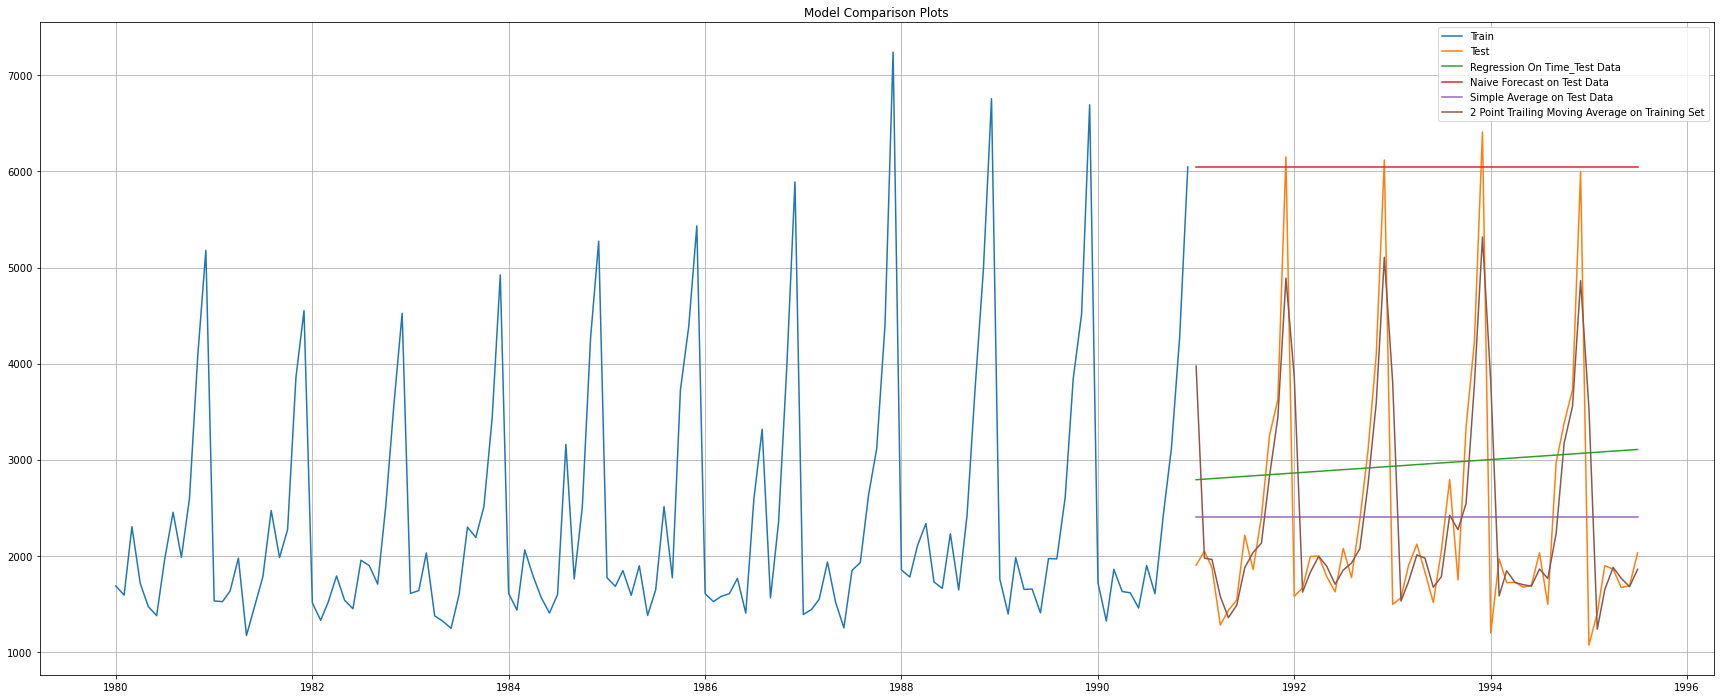

In [74]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [75]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [76]:
SES_train = train_sparkling.copy()
SES_test = test_sparkling.copy()

In [77]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [78]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [79]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [80]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_sparkling))
SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.932624
1991-02-01       2049  2724.932624
1991-03-01       1874  2724.932624
1991-04-01       1279  2724.932624
1991-05-01       1432  2724.932624

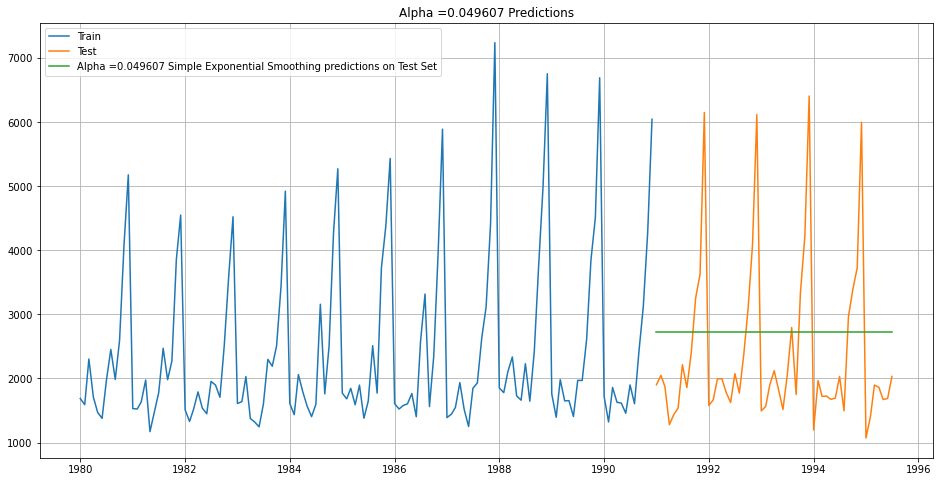

In [81]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049607 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.049607 Predictions');

### Model Evaluation for $\alpha$ = 0.049607 : Simple Exponential Smoothing

In [82]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.049607 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.049607 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [83]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.049607,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                           1389.135175
NaiveModel                                 3864.279352
SimpleAverageModel                         1275.081804
2pointTrailingMovingAverage                 813.400684
4pointTrailingMovingAverage                1156.589694
6pointTrailingMovingAverage                1283.927428
9pointTrailingMovingAverage                1346.278315
Alpha=0.049607,SimpleExponentialSmoothing  1316.035487

In [84]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [85]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [86]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.3  1359.511747  1935.507132
1           0.4  1352.588879  2311.919615
2           0.5  1344.004369  2666.351413
3           0.6  1338.805381  2979.204388
4           0.7  1338.844308  3249.944092
5           0.8  1344.462091  3483.801006
6           0.9  1355.723518  3686.794285

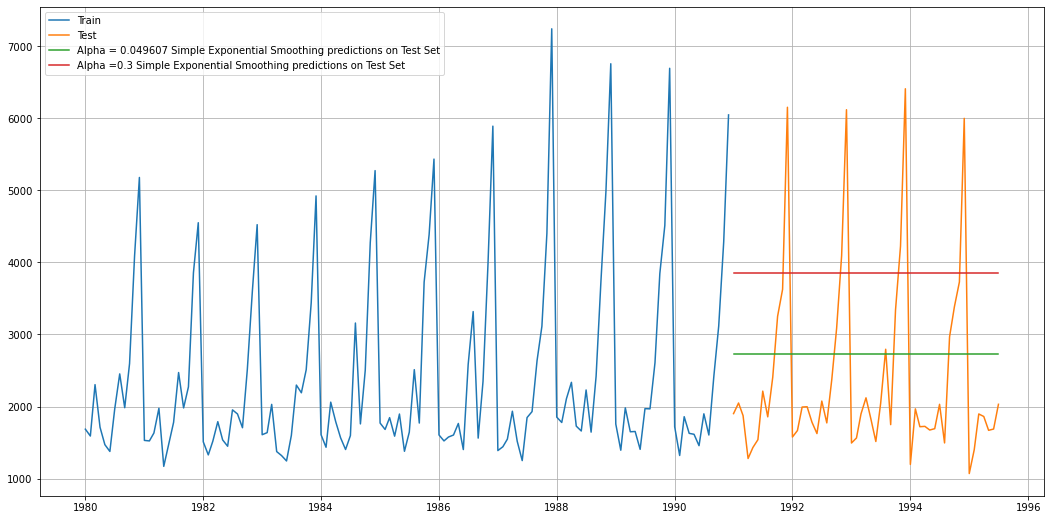

In [87]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha = 0.049607 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [88]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                           1389.135175
NaiveModel                                 3864.279352
SimpleAverageModel                         1275.081804
2pointTrailingMovingAverage                 813.400684
4pointTrailingMovingAverage                1156.589694
6pointTrailingMovingAverage                1283.927428
9pointTrailingMovingAverage                1346.278315
Alpha=0.049607,SimpleExponentialSmoothing  1316.035487
Alpha=0.3,SimpleExponentialSmoothing       1935.507132

## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [89]:
DES_train = train_sparkling.copy()
DES_test = test_sparkling.copy()

In [90]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [91]:

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [92]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [93]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
1            0.3          0.4  1682.573828  26069.841401
2            0.3          0.5  1771.710791  34401.512440
3            0.3          0.6  1848.576510  42162.748095
4            0.3          0.7  1899.949006  47832.397419
..           ...          ...          ...           ...
59           1.0          0.6  1753.402326  49327.087977
60           1.0          0.7  1825.187155  52655.765663
61           1.0          0.8  1902.013709  55442.273880
62           1.0          0.9  1985.368445  57823.177011
63           1.0          1.0  2077.672157  59877.076519

[64 rows x 4 columns]

In [94]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
8            0.4          0.3  1569.338606  23878.496940
1            0.3          0.4  1682.573828  26069.841401
16           0.5          0.3  1530.575845  27095.532414
24           0.6          0.3  1506.449870  29070.722592

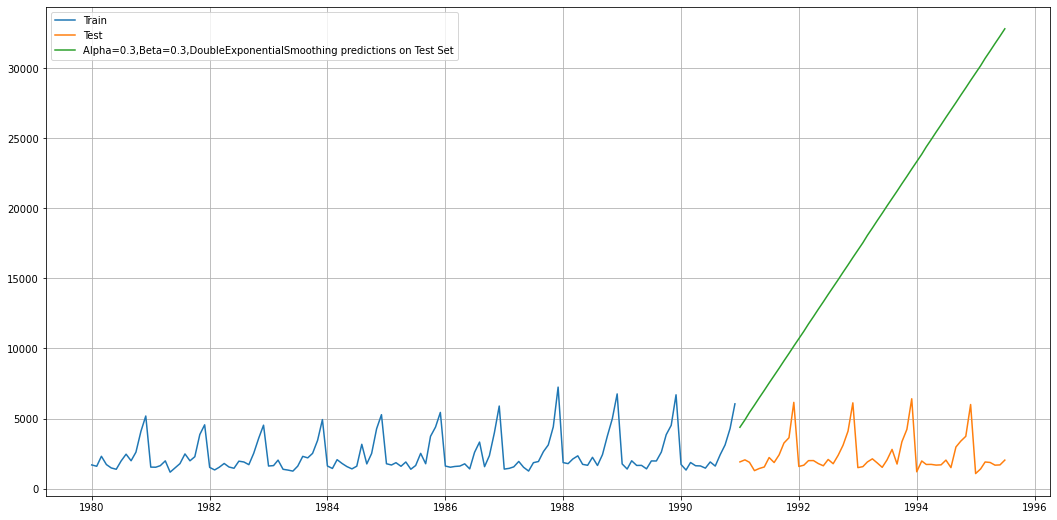

In [95]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [96]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                1389.135175
NaiveModel                                      3864.279352
SimpleAverageModel                              1275.081804
2pointTrailingMovingAverage                      813.400684
4pointTrailingMovingAverage                     1156.589694
6pointTrailingMovingAverage                     1283.927428
9pointTrailingMovingAverage                     1346.278315
Alpha=0.049607,SimpleExponentialSmoothing       1316.035487
Alpha=0.3,SimpleExponentialSmoothing            1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  18259.110704

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [97]:
TES_train = train_sparkling.copy()
TES_test = test_sparkling.copy()

In [98]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [99]:
model_TES_autofit = model_TES.fit()

In [100]:
model_TES_autofit.params

{'smoothing_level': 0.111108139467838,
 'smoothing_trend': 0.06172875597197263,
 'smoothing_seasonal': 0.3950479631147446,
 'damping_trend': nan,
 'initial_level': 1639.9340657558994,
 'initial_trend': -12.22494561218149,
 'initial_seasons': array([1.06402008, 1.02352078, 1.40671876, 1.20165543, 0.97593   ,
        0.97100155, 1.31897446, 1.69588922, 1.3895294 , 1.81476396,
        2.85150039, 3.62470528]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [101]:

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_sparkling))
TES_test.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1577.224489
1991-02-01       2049   1333.677558
1991-03-01       1874   1745.945679
1991-04-01       1279   1630.411925
1991-05-01       1432   1523.289070

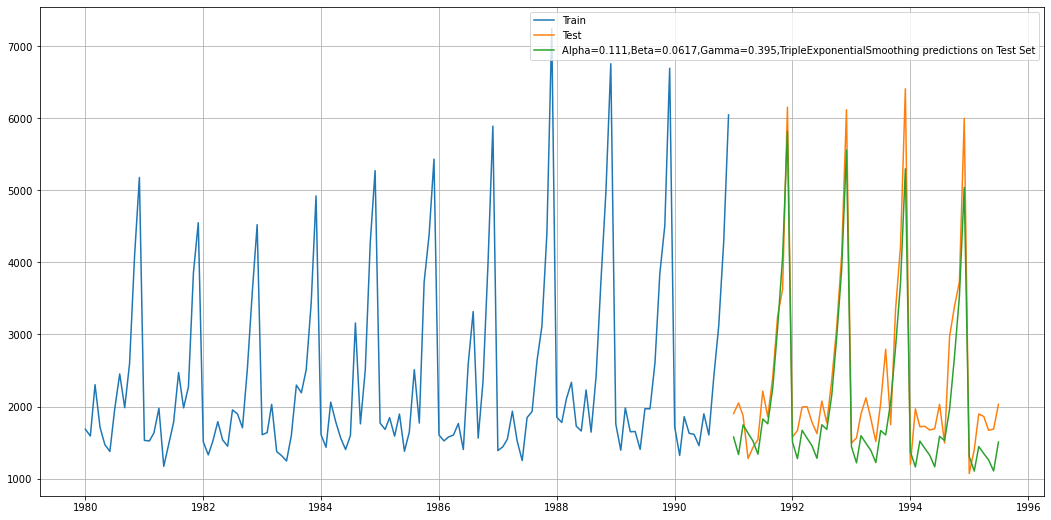

In [102]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.0617,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [103]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.0617,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.111,Beta=0.0617,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.768


In [104]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                     1389.135175
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0.049607,SimpleExponentialSmoothing            1316.035487
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...    469.767970

In [105]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [106]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [107]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
0             0.3          0.3           0.3     404.513320  3.927862e+02
1             0.3          0.3           0.4     402.088628  9.513202e+02
2             0.3          0.3           0.5     408.282432  1.470487e+03
3             0.3          0.3           0.6     428.631668  2.181724e+03
4             0.3          0.3           0.7     468.958530  3.513351e+03
..            ...          ...           ...            ...           ...
507           1.0          1.0           0.6  153394.791826  7.989790e+05
508           1.0          1.0           0.7   94040.964958  1.074413e+06
509           1.0          1.0           0.8  102196.953755  5.010607e+06
510           1.0          1.0           0.9   77924.294413  4.318265e+05
511           1.0          1.0           1.0  239917.432847  1.254280e+05

[512 rows x 5 columns]

In [108]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
0             0.3          0.3           0.3  404.513320  392.786198
8             0.3          0.4           0.3  424.828055  410.854547
65            0.4          0.3           0.4  435.553595  421.409170
296           0.7          0.8           0.3  700.317756  518.188752
130           0.5          0.3           0.5  498.239915  542.175497

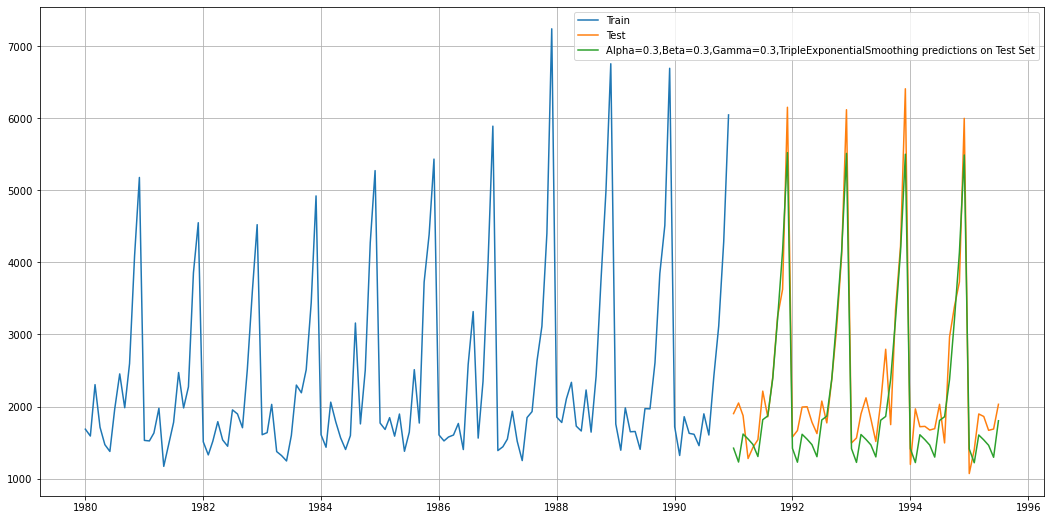

In [109]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3,0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [110]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                     1389.135175
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0.049607,SimpleExponentialSmoothing            1316.035487
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...    469.767970
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198

In [111]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...    469.767970
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
SimpleAverageModel                                   1275.081804
6pointTrailingMovingAverage                          1283.927428
Alpha=0.049607,SimpleExponentialSmoothing            1316.035487
9pointTrailingMovingAverage                          1346.278315
RegressionOnTime                                     1389.135175
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
NaiveModel                                           3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

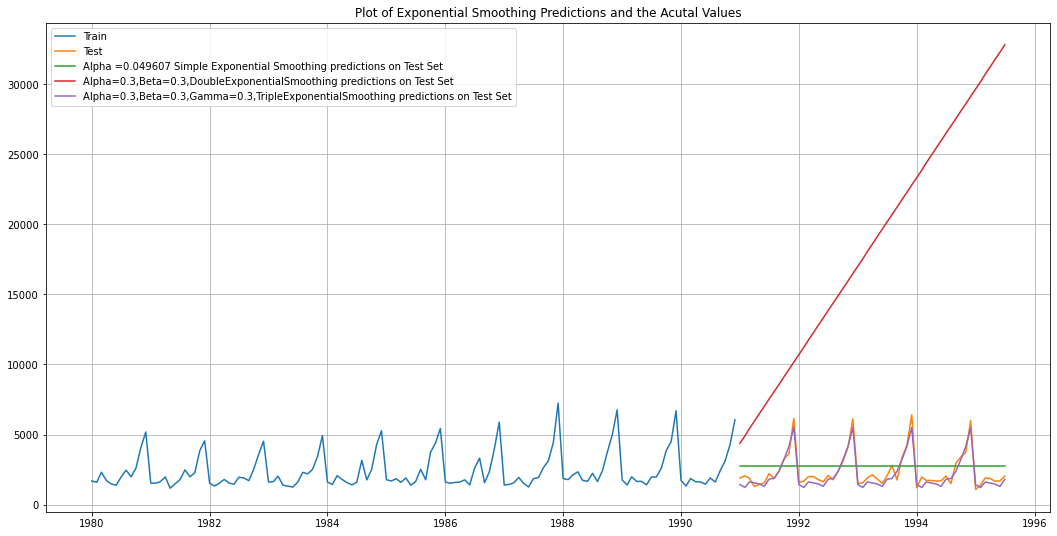

In [112]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049607 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.3, 0.3, 0.3], label='Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

**Check for stationarity of the whole Time Series data**

In [113]:
from statsmodels.tsa.stattools import adfuller

In [114]:

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

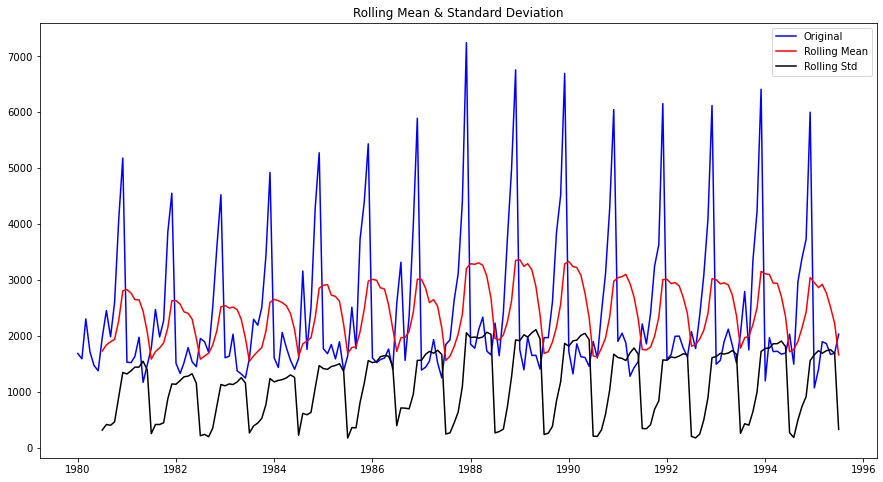

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [115]:
test_stationarity(df1['Sparkling'])

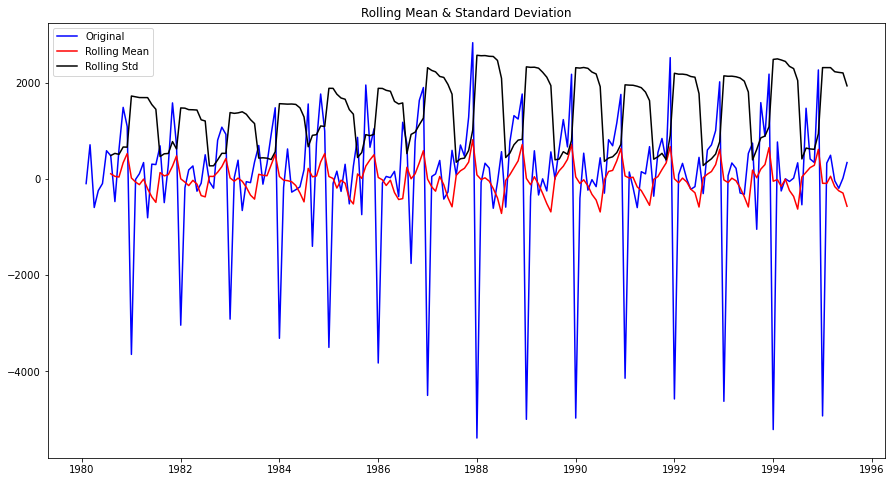

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [116]:
test_stationarity(df1['Sparkling'].diff().dropna())

**Check for stationarity of the Training Data Time Series**

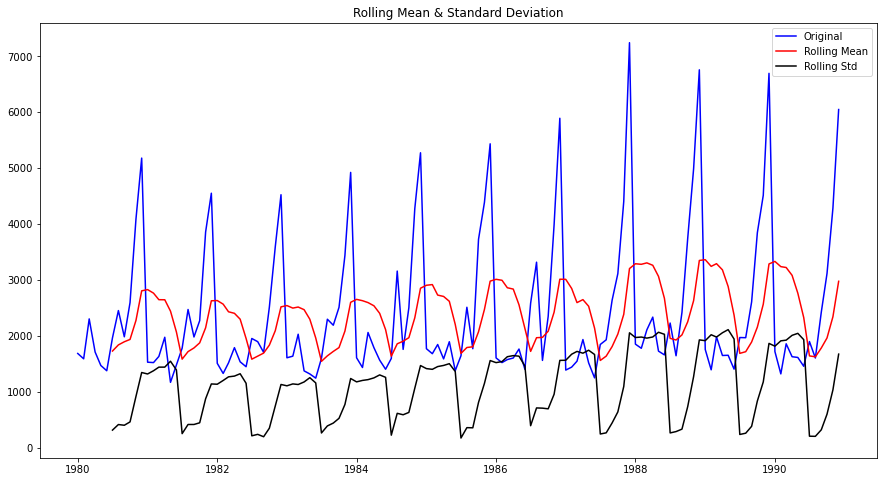

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [117]:
test_stationarity(train_sparkling['Sparkling'])

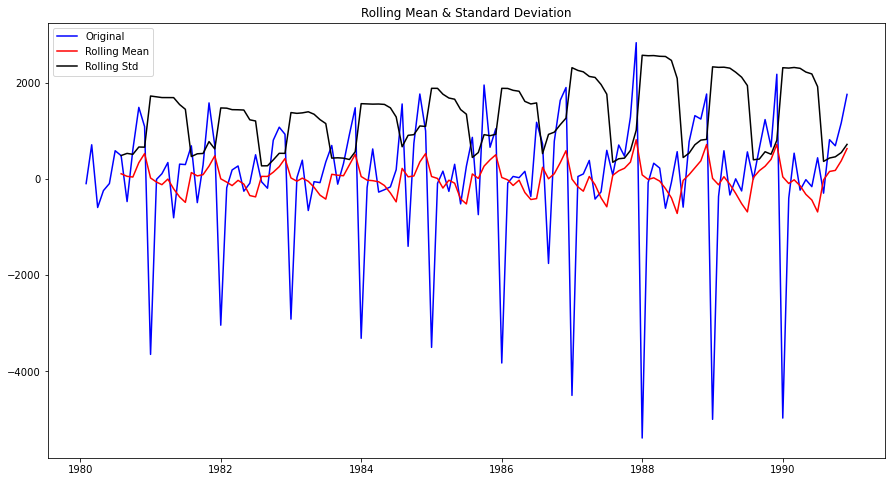

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [118]:
test_stationarity(train_sparkling['Sparkling'].diff().dropna())

## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

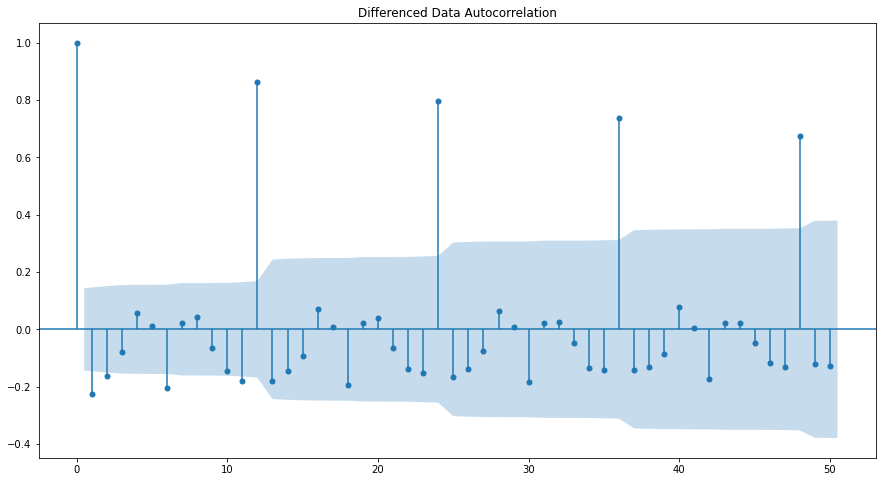

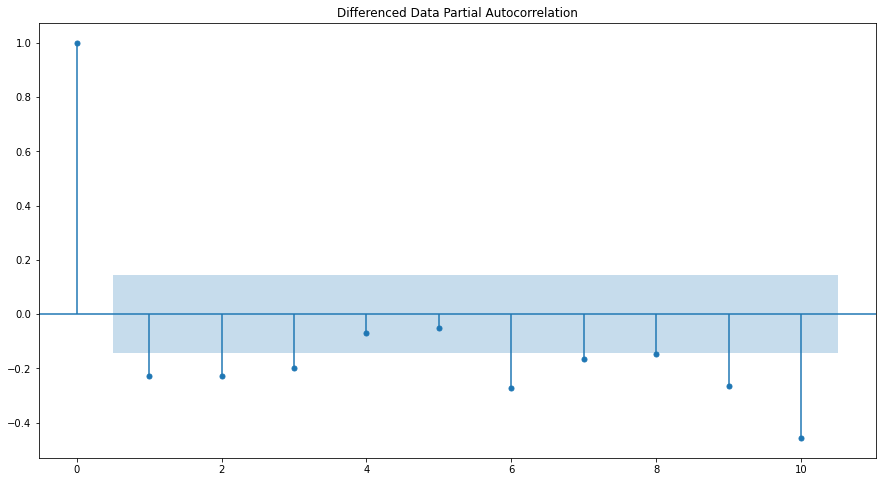

In [245]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

In [119]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [120]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [121]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_sparkling['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906438611577


C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 2) - AIC:2232.78309768405
ARIMA(0, 1, 3) - AIC:2233.016605137543
ARIMA(1, 1, 0) - AIC:2268.5280607650034
ARIMA(1, 1, 1) - AIC:2235.0139453493175


C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIM

ARIMA(1, 1, 2) - AIC:2233.597647121205


C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(1, 1, 3) - AIC:2234.5741415460398
ARIMA(2, 1, 0) - AIC:2262.035600155025


C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(2, 1, 1) - AIC:2232.3604899121387


C:\Users\siva\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning

ARIMA(2, 1, 2) - AIC:2210.6260491378257


C:\Users\siva\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning

ARIMA(2, 1, 3) - AIC:2229.3580937707247
ARIMA(3, 1, 0) - AIC:2259.471554891012


C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(3, 1, 1) - AIC:2233.9217586494697


C:\Users\siva\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning

ARIMA(3, 1, 2) - AIC:2228.9278973619453
ARIMA(3, 1, 3) - AIC:2225.661558525123


C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [246]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2210.626049
15  (3, 1, 3)  2225.661559
14  (3, 1, 2)  2228.927897
11  (2, 1, 3)  2229.358094
9   (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
3   (0, 1, 3)  2233.016605
6   (1, 1, 2)  2233.597647
13  (3, 1, 1)  2233.921759
7   (1, 1, 3)  2234.574142
5   (1, 1, 1)  2235.013945
12  (3, 1, 0)  2259.471555
8   (2, 1, 0)  2262.035600
1   (0, 1, 1)  2264.906439
4   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [123]:
auto_ARIMA = ARIMA(train_sparkling['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.313
Method:                       css-mle   S.D. of innovations           1013.755
Date:                Sun, 13 Feb 2022   AIC                           2210.626
Time:                        00:58:57   BIC                           2227.877
Sample:                    02-01-1980   HQIC                          2217.636
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5845      0.519     10.753      0.000       4.567       6.602
ar.L1.D.Sparkling     1.2698      0.075     17.040      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\siva\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning

## Predict on the Test Set using this model and evaluate the model.

In [124]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_sparkling))

In [125]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_sparkling['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.0370092580251


In [126]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE
RegressionOnTime                                     1389.135175
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0.049607,SimpleExponentialSmoothing            1316.035487
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...    469.767970
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
ARIMA(2,1,2)                                         1374.037009

In [127]:
resultsDf.sort_values(by='Test RMSE',ascending=True)

Test RMSE
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...    469.767970
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
SimpleAverageModel                                   1275.081804
6pointTrailingMovingAverage                          1283.927428
Alpha=0.049607,SimpleExponentialSmoothing            1316.035487
9pointTrailingMovingAverage                          1346.278315
ARIMA(2,1,2)                                         1374.037009
RegressionOnTime                                     1389.135175
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
NaiveModel                                           3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

In [128]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

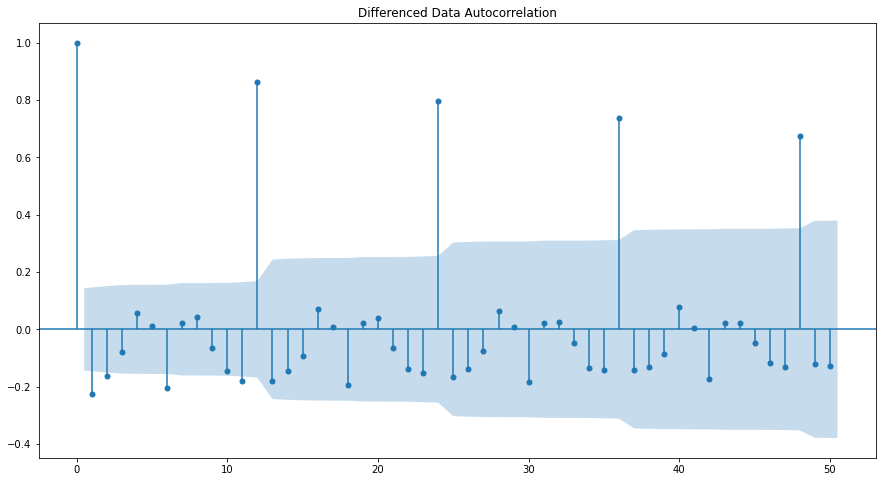

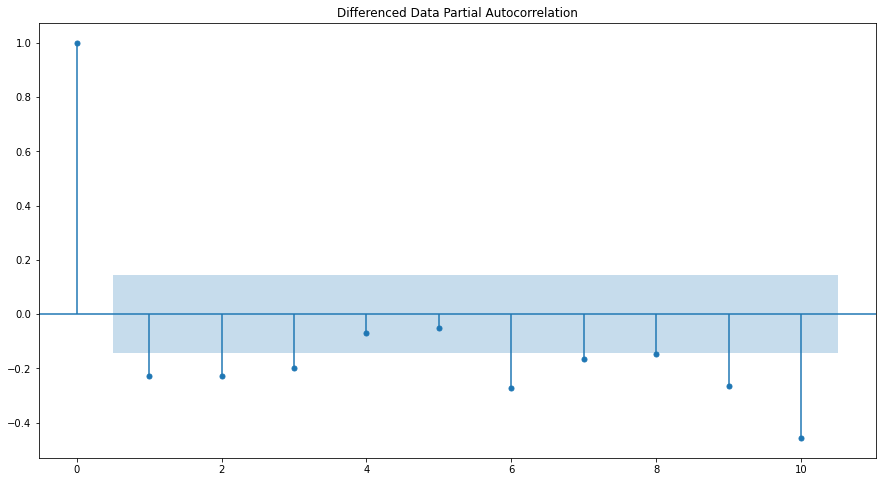

In [129]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we can say that the PACF cuts-off at lag 3 and ACF plot cuts-off at lag 2.

In [130]:
manual_ARIMA = ARIMA(train_sparkling['Sparkling'].astype('float64'), order=(3,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.238
Date:                Sun, 13 Feb 2022   AIC                           2228.928
Time:                        00:58:58   BIC                           2249.054
Sample:                    02-01-1980   HQIC                          2237.106
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9844      3.643      1.643      0.100      -1.156      13.125
ar.L1.D.Sparkling    -0.4420   1.28e-05  -3.46e+04      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.

C:\Users\siva\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning

## Predict on the Test Set using this model and evaluate the model.

In [131]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_sparkling))

In [132]:
rmse = mean_squared_error(test_sparkling['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1379.0491231340152


In [133]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA_Manual(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                     1389.135175
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0.049607,SimpleExponentialSmoothing            1316.035487
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...    469.767970
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
ARIMA(2,1,2)                                         1374.037009
ARIMA_Manual(3,1,2)                                  1379.049123

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

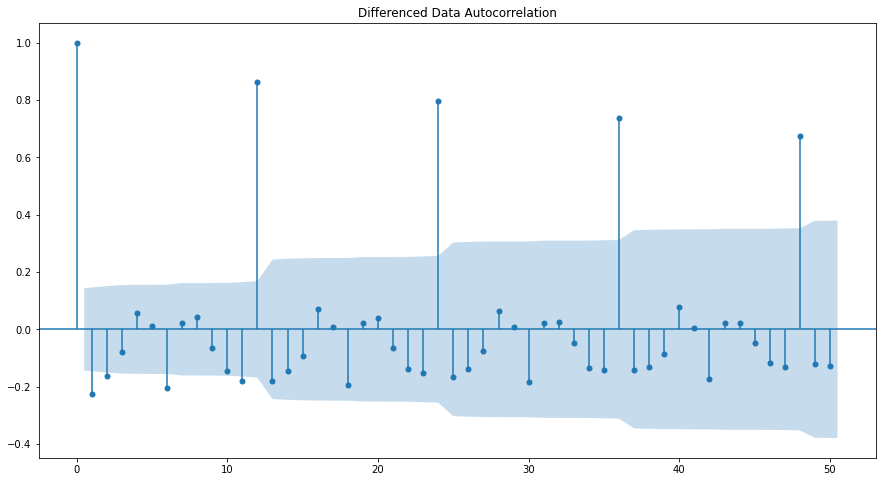

In [134]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12 . We will run our auto SARIMA models by setting seasonality both as  12.

### Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [135]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [136]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [137]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235496
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791944
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158611443
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920774
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956687
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957278316
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838032
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319373017
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.13196585489
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176586
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245088165164
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018833130494
SARIMA(0, 1, 2)

In [138]:
SARIMA_AIC.sort_values(by=['AIC']).head(10)

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340404
80  (2, 1, 2)  (2, 0, 2, 12)  1557.689323
14  (0, 1, 1)  (1, 0, 2, 12)  1570.131966
17  (0, 1, 1)  (2, 0, 2, 12)  1570.401883
41  (1, 1, 1)  (1, 0, 2, 12)  1571.324886
44  (1, 1, 1)  (2, 0, 2, 12)  1571.806997

In [139]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 13 Feb 2022   AIC                           1555.584
Time:                                    00:59:43   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

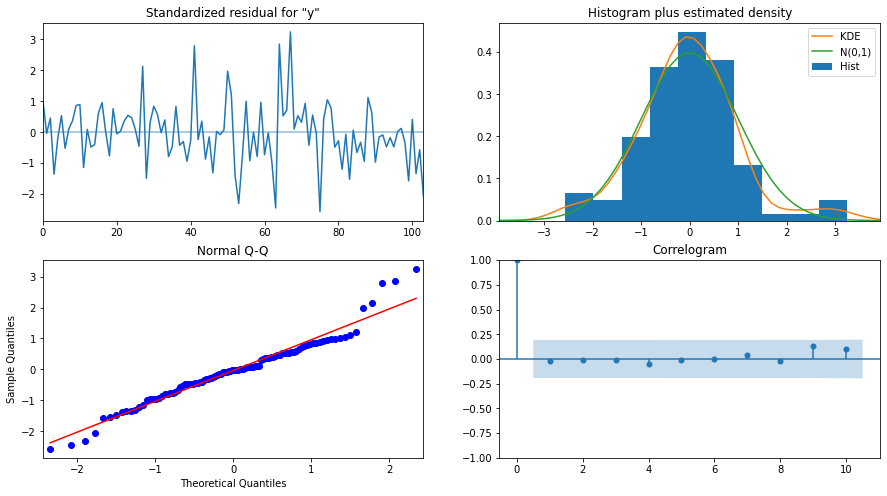

In [140]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [141]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test_sparkling))

In [142]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.391808  388.342295     566.254897    2088.528719
1  1315.124183  402.004779     527.209295    2103.039070
2  1621.595424  401.998386     833.693067    2409.497782
3  1598.879289  407.235895     800.711601    2397.046976
4  1392.696749  407.965802     593.098470    2192.295028

In [143]:
rmse = mean_squared_error(test_sparkling['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

528.6126533320019


In [144]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                     1389.135175
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0.049607,SimpleExponentialSmoothing            1316.035487
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...    469.767970
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
ARIMA(2,1,2)                                         1374.037009
ARIMA_Manual(3,1,2)                                  1379.049123
SARIMA(1,1,2)(1,0,2,12)                               528.612653

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

C:\Users\siva\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


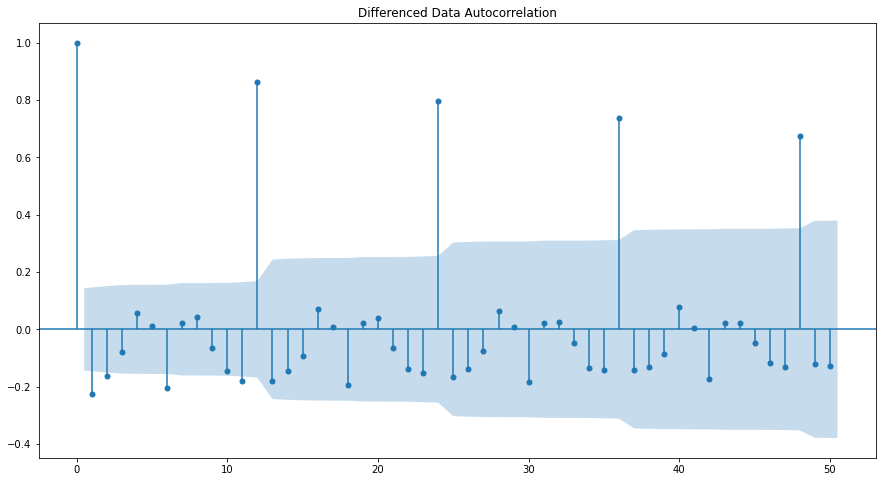

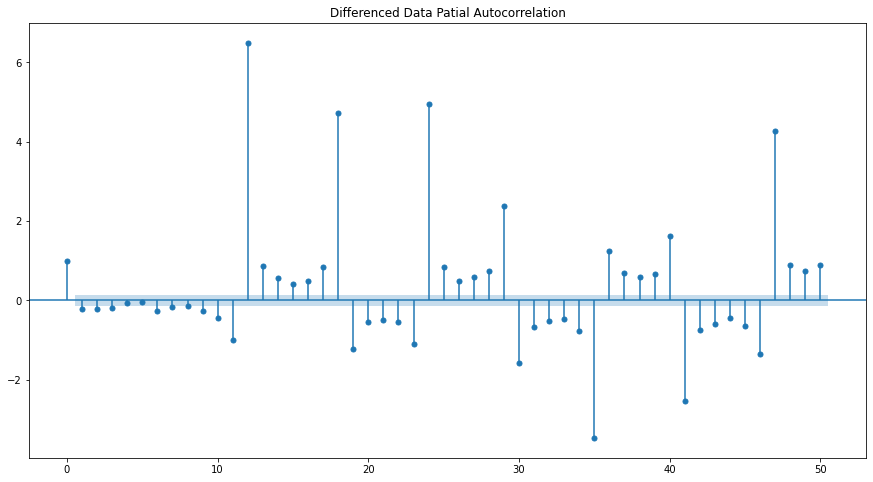

In [145]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

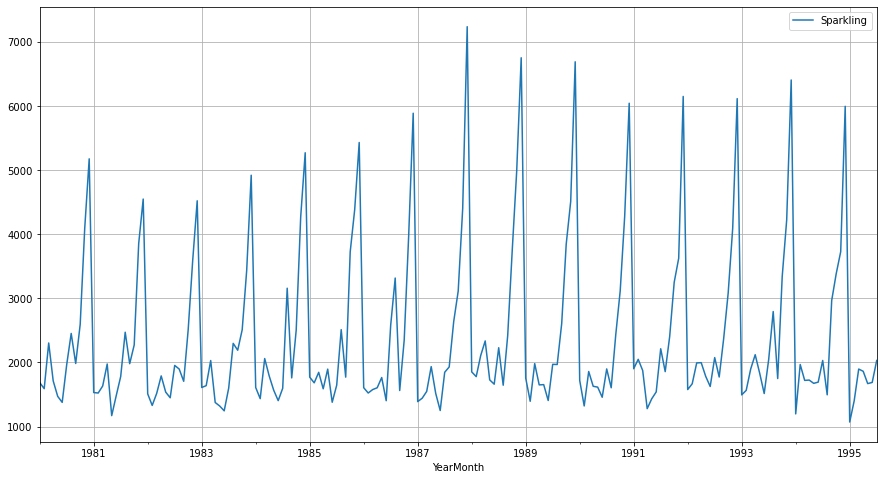

In [146]:
df1.plot()
plt.grid();

There is no visible trend on the data. However, there is some seasonality observed. Hence we will now take seasonality differencing and check the timeseries again.From the ACF plot, the significant lags are at 6, 12,etc. Hence we will first take 6 as the seasonal difference.

In [147]:
#test_stationarity(train_sparkling['Sparkling'].diff().dropna())

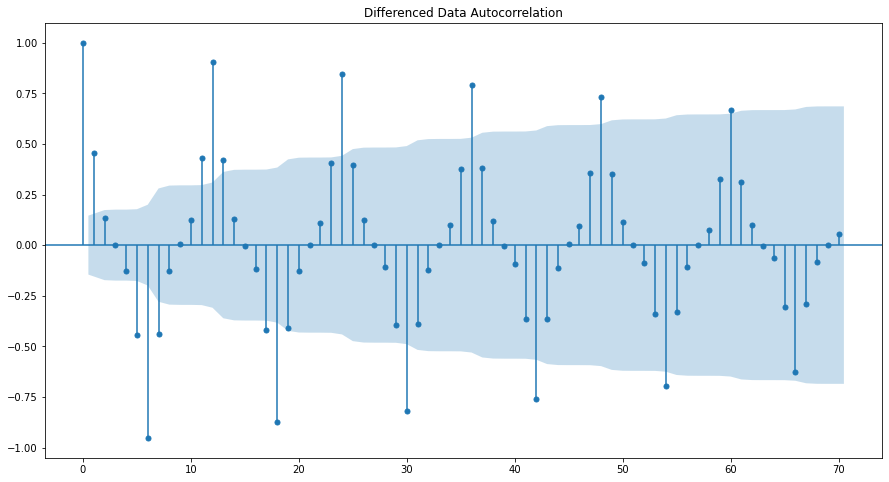

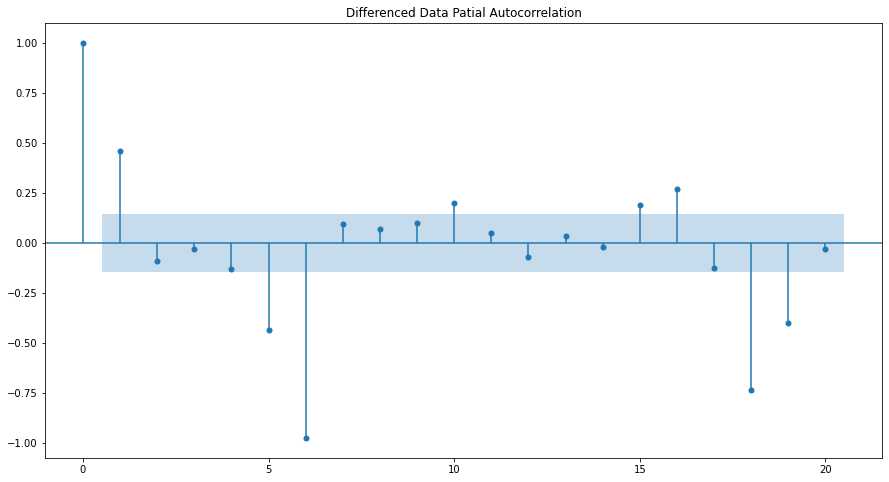

In [148]:
plot_acf(df1['Sparkling'].diff(6).dropna(),lags=70,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff(6).dropna(),lags=20,title='Differenced Data Patial Autocorrelation')
plt.show()

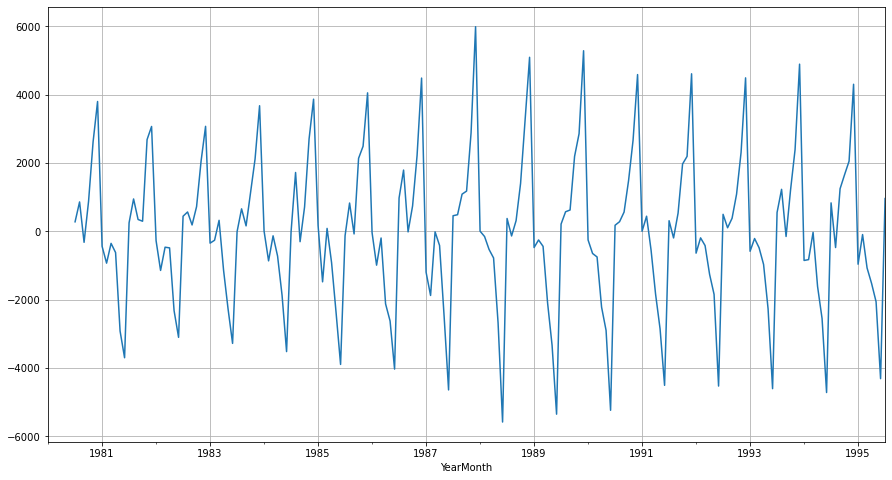

In [149]:
(df1['Sparkling'].diff(6)).plot()
plt.grid();

we still observe seasonality in the data. Let take first order differencing again. 

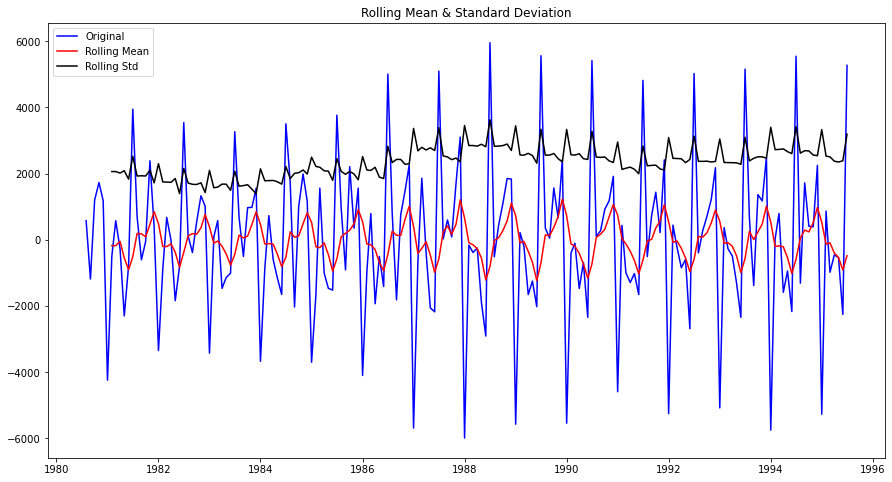

Results of Dickey-Fuller Test:
Test Statistic                -8.025163e+00
p-value                        2.026548e-12
#Lags Used                     1.400000e+01
Number of Observations Used    1.650000e+02
Critical Value (1%)           -3.470616e+00
Critical Value (5%)           -2.879221e+00
Critical Value (10%)          -2.576197e+00
dtype: float64 



In [150]:
test_stationarity((df1['Sparkling'].diff(6).dropna()).diff(1).dropna())
#test_stationarity(df1['Sparkling'].diff(6).dropna())

C:\Users\siva\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


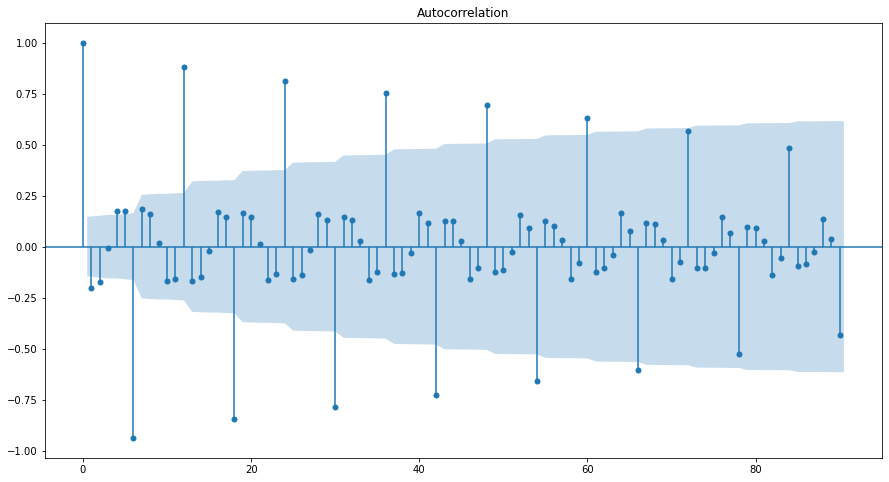

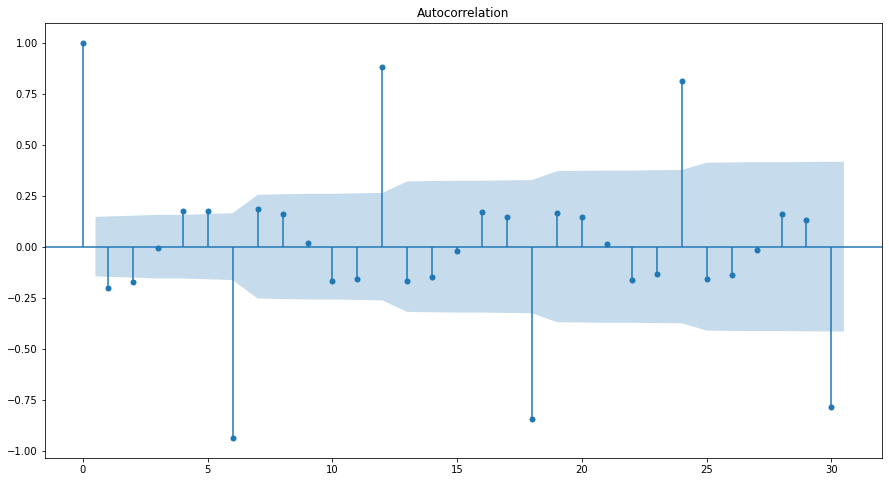

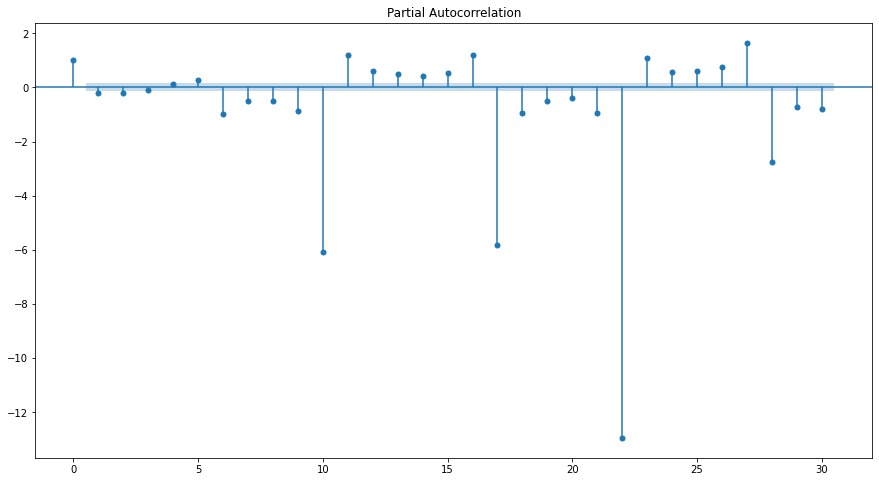

In [151]:
plot_acf((df1['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=90)
plot_acf((df1['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df1['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

we see that p = 2 , q = 2, P = 3, Q = 11

<AxesSubplot:xlabel='YearMonth'>

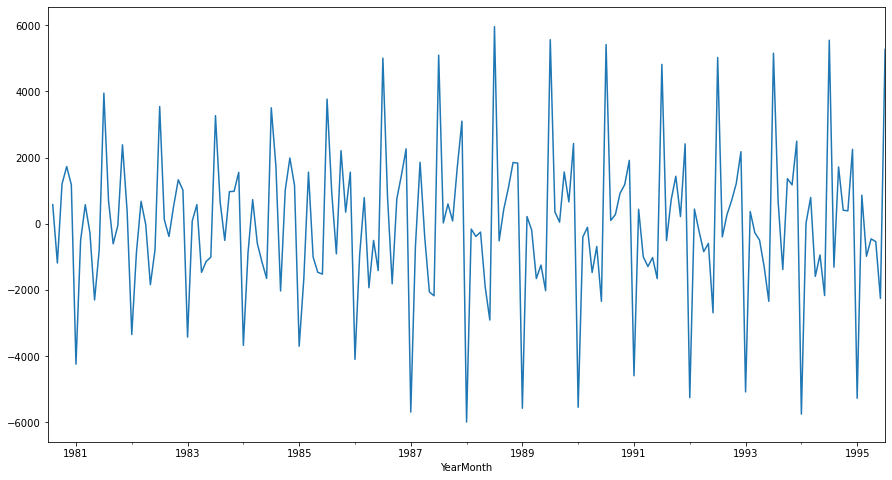

In [152]:
((df1['Sparkling'].diff(6).dropna()).diff(1)).plot()

In [153]:
import itertools
p = q = range(0,2)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('SARIMA Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
SARIMA Model: (0, 1, 1)(0, 1, 1, 6)
SARIMA Model: (1, 1, 0)(1, 1, 0, 6)
SARIMA Model: (1, 1, 1)(1, 1, 1, 6)


In [154]:
SARIMA_MANUAL_6 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_MANUAL_6

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [155]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_manual = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_manual = SARIMA_model_manual.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_manual.aic))
        SARIMA_MANUAL_6 = SARIMA_MANUAL_6.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_manual.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 6) - AIC:2262.9835238897754
SARIMA(0, 1, 0)x(0, 1, 1, 6) - AIC:2018.7784206922179
SARIMA(0, 1, 0)x(1, 1, 0, 6) - AIC:1838.4913791966646
SARIMA(0, 1, 0)x(1, 1, 1, 6) - AIC:1825.5404759866062
SARIMA(0, 1, 1)x(0, 1, 0, 6) - AIC:2243.355144109237
SARIMA(0, 1, 1)x(0, 1, 1, 6) - AIC:1999.5210480233047
SARIMA(0, 1, 1)x(1, 1, 0, 6) - AIC:1797.840562222025
SARIMA(0, 1, 1)x(1, 1, 1, 6) - AIC:1763.5428092784489
SARIMA(1, 1, 0)x(0, 1, 0, 6) - AIC:2263.080729551281
SARIMA(1, 1, 0)x(0, 1, 1, 6) - AIC:2018.2022955297343
SARIMA(1, 1, 0)x(1, 1, 0, 6) - AIC:1811.9491517600718
SARIMA(1, 1, 0)x(1, 1, 1, 6) - AIC:1813.3969764959143
SARIMA(1, 1, 1)x(0, 1, 0, 6) - AIC:2221.427528137716
SARIMA(1, 1, 1)x(0, 1, 1, 6) - AIC:1979.798765059597
SARIMA(1, 1, 1)x(1, 1, 0, 6) - AIC:1776.3196208573345
SARIMA(1, 1, 1)x(1, 1, 1, 6) - AIC:1760.4963381857435


In [156]:
SARIMA_MANUAL_6.sort_values(by=['AIC']).head(10)

param      seasonal          AIC
15  (1, 1, 1)  (1, 1, 1, 6)  1760.496338
7   (0, 1, 1)  (1, 1, 1, 6)  1763.542809
14  (1, 1, 1)  (1, 1, 0, 6)  1776.319621
6   (0, 1, 1)  (1, 1, 0, 6)  1797.840562
10  (1, 1, 0)  (1, 1, 0, 6)  1811.949152
11  (1, 1, 0)  (1, 1, 1, 6)  1813.396976
3   (0, 1, 0)  (1, 1, 1, 6)  1825.540476
2   (0, 1, 0)  (1, 1, 0, 6)  1838.491379
13  (1, 1, 1)  (0, 1, 1, 6)  1979.798765
5   (0, 1, 1)  (0, 1, 1, 6)  1999.521048

In [157]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                order=(1,1,1),
                                seasonal_order=(1, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -875.248
Date:                           Sun, 13 Feb 2022   AIC                           1760.496
Time:                                   00:59:49   BIC                           1774.307
Sample:                                        0   HQIC                          1766.103
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2360      0.070      3.360      0.001       0.098       0.374
ma.L1         -1.0000      0.097    -10.340

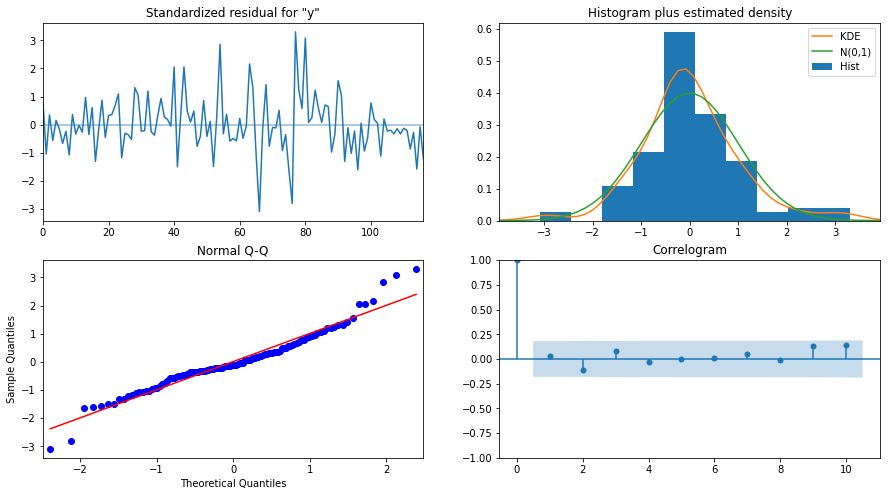

In [158]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

the model diagnostics look ok

## Predict on the Test Set using this model and evaluate the model.

In [159]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test_sparkling))

In [160]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1612.335167  424.294876     780.732491    2443.937842
1  1335.410964  436.751218     479.394306    2191.427621
2  1891.134787  437.623613    1033.408268    2748.861307
3  1718.652532  437.716779     860.743410    2576.561654
4  1696.955580  437.732499     839.015647    2554.895513

In [161]:
rmse = mean_squared_error(test_sparkling['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

334.3332263021214


In [162]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA_Manual(2,1,2)(3,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                     1389.135175
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0.049607,SimpleExponentialSmoothing            1316.035487
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...    469.767970
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
ARIMA(2,1,2)                                         1374.037009
ARIMA_Manual(3,1,2)                                  1379.049123
SARIMA(1,1,2)(1,0,2,12)                               528.612653
SARIMA_Manual(2,1,2)(3,1,3,6)                         334.333226

## With seasonality 12

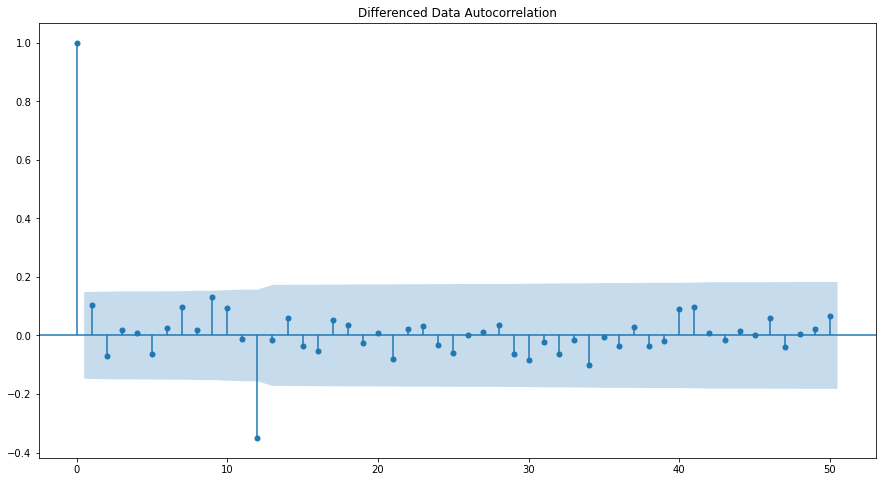

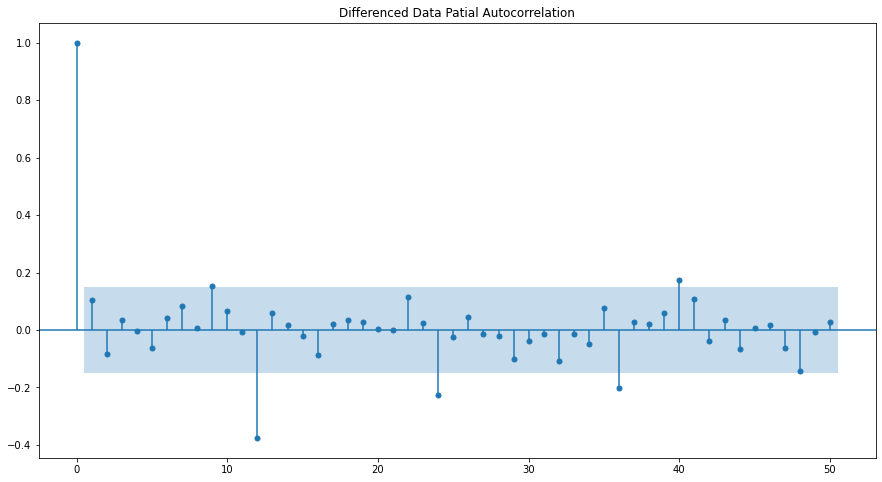

In [163]:
plot_acf(df1['Sparkling'].diff(12).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff(12).dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

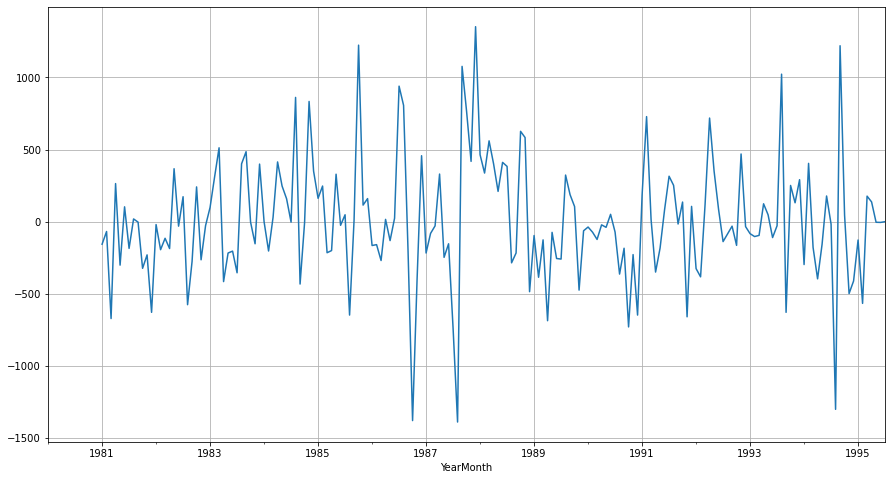

In [164]:
(df1['Sparkling'].diff(12)).plot()
plt.grid();

we still observe seasonality in the data. Let take first order differencing again. 

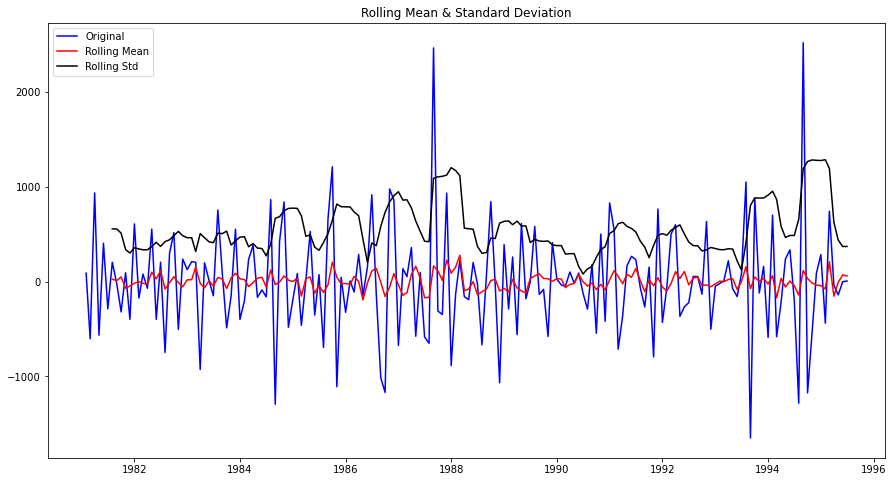

Results of Dickey-Fuller Test:
Test Statistic                  -5.113533
p-value                          0.000013
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [165]:
test_stationarity((df1['Sparkling'].diff(12).dropna()).diff(1).dropna())


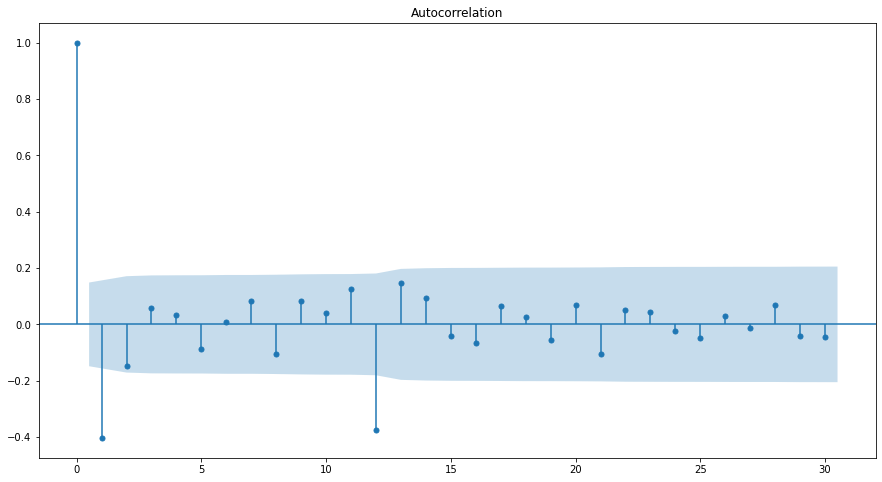

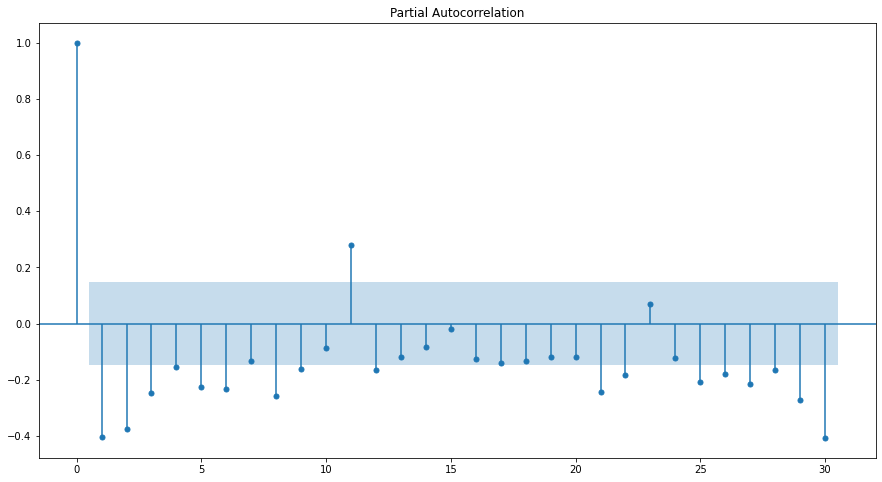

In [166]:
plot_acf((df1['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df1['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

we see that p = 3 , q = 1, P = 1, Q = 1

In [167]:
import itertools
p =  range(0,4)
q = range(1,2)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('SARIMA Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
SARIMA Model: (1, 1, 1)(1, 1, 1, 12)
SARIMA Model: (2, 1, 1)(2, 1, 1, 12)
SARIMA Model: (3, 1, 1)(3, 1, 1, 12)


In [168]:
SARIMA_MANUAL_12 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_MANUAL_12

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [169]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_manual = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_manual = SARIMA_model_manual.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_manual.aic))
        SARIMA_MANUAL_12 = SARIMA_MANUAL_12.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_manual.aic}, ignore_index=True)

SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.6639234230142
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1570.8550259195656
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1429.6168027963352
SARIMA(0, 1, 1)x(3, 1, 1, 12) - AIC:1257.4558568590317
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1569.3827366812761
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1570.6724644582819
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:1414.8736681604653
SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:1242.664098885306
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:1570.175592261096
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1571.8577388006777
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1401.992473547397
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:1230.1483342049005
SARIMA(3, 1, 1)x(0, 1, 1, 12) - AIC:1572.0715279677518
SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:1559.6931631943532
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:1387.5203747530745
SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:1217.7138947668946


In [170]:
SARIMA_MANUAL_12.sort_values(by=['AIC']).head(10)

param       seasonal          AIC
15  (3, 1, 1)  (3, 1, 1, 12)  1217.713895
11  (2, 1, 1)  (3, 1, 1, 12)  1230.148334
7   (1, 1, 1)  (3, 1, 1, 12)  1242.664099
3   (0, 1, 1)  (3, 1, 1, 12)  1257.455857
14  (3, 1, 1)  (2, 1, 1, 12)  1387.520375
10  (2, 1, 1)  (2, 1, 1, 12)  1401.992474
6   (1, 1, 1)  (2, 1, 1, 12)  1414.873668
2   (0, 1, 1)  (2, 1, 1, 12)  1429.616803
13  (3, 1, 1)  (1, 1, 1, 12)  1559.693163
4   (1, 1, 1)  (0, 1, 1, 12)  1569.382737

In [171]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                order=(3,1,1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -599.857
Date:                            Sun, 13 Feb 2022   AIC                           1217.714
Time:                                    01:00:07   BIC                           1239.152
Sample:                                         0   HQIC                          1226.309
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2077      0.159      1.304      0.192      -0.104       0.520
ar.L2         -0.0845      0.149   

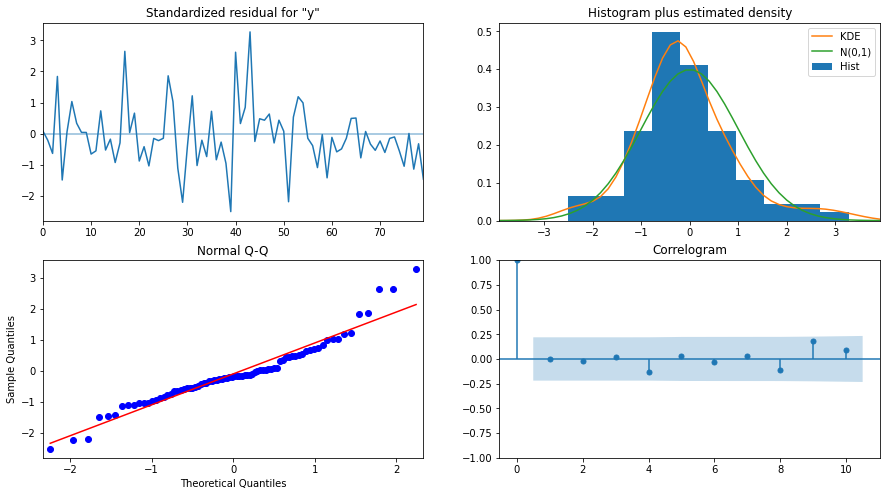

In [172]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

the model diagnostics look ok

## Predict on the Test Set using this model and evaluate the model.

In [173]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test_sparkling))

In [174]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1546.958101  435.721305     692.960036    2400.956165
1  1389.878671  448.676632     510.488632    2269.268709
2  1831.490963  448.679395     952.095509    2710.886417
3  1715.851867  450.360451     833.161604    2598.542130
4  1605.057940  451.499015     720.136131    2489.979749

In [175]:
rmse = mean_squared_error(test_sparkling['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

333.54101003924967


In [176]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA_Manual(3,1,1)(3,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                     1389.135175
NaiveModel                                           3864.279352
SimpleAverageModel                                   1275.081804
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
6pointTrailingMovingAverage                          1283.927428
9pointTrailingMovingAverage                          1346.278315
Alpha=0.049607,SimpleExponentialSmoothing            1316.035487
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...    469.767970
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
ARIMA(2,1,2)                                         1374.037009
ARIMA_Manual(3,1,2)                                  1379.049123
SARIMA(1,1,2)(1,0,2,12)                               528.612653
SARIMA_Manual(2,1,2)(3,1,3,6)                         334.333226
SARIMA_Manual(3,1,1)(3,1,1,12)                        333.541010

## Building the most optimum model on the Full Data.

In [177]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

Test RMSE
SARIMA_Manual(3,1,1)(3,1,1,12)                        333.541010
SARIMA_Manual(2,1,2)(3,1,3,6)                         334.333226
Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialS...    392.786198
Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExpone...    469.767970
SARIMA(1,1,2)(1,0,2,12)                               528.612653
2pointTrailingMovingAverage                           813.400684
4pointTrailingMovingAverage                          1156.589694
SimpleAverageModel                                   1275.081804
6pointTrailingMovingAverage                          1283.927428
Alpha=0.049607,SimpleExponentialSmoothing            1316.035487
9pointTrailingMovingAverage                          1346.278315
ARIMA(2,1,2)                                         1374.037009
ARIMA_Manual(3,1,2)                                  1379.049123
RegressionOnTime                                     1389.135175
Alpha=0.3,SimpleExponentialSmoothing                 1935.507132
NaiveModel                                           3864.279352
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704

## SARIMA_Manual(3,1,1)(3,1,1,12) on whole data

In [216]:
full_data_model_1 = sm.tsa.statespace.SARIMAX(df1['Sparkling'],
                                order=(3,1,1),
                                seasonal_order=(3,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_1 = full_data_model_1.fit(maxiter=1000)
print(results_full_data_model_1.summary())

C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood               -1001.452
Date:                            Sun, 13 Feb 2022   AIC                           2020.904
Time:                                    01:41:49   BIC                           2047.051
Sample:                                01-01-1980   HQIC                          2031.529
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1157      0.090      1.286      0.198      -0.061       0.292
ar.L2         -0.0824      0.110   

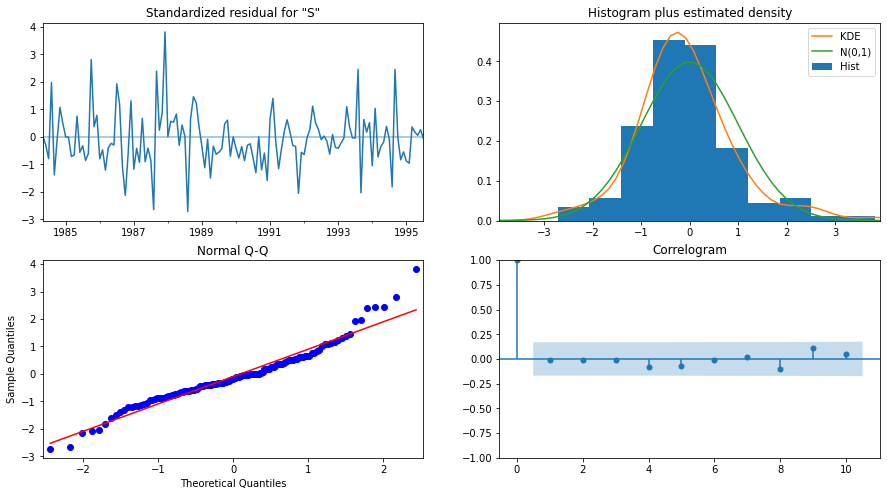

In [217]:
results_full_data_model_1.plot_diagnostics();

## Evaluate the model on the whole and predict 12 months into the future

In [218]:
df1['Sparkling'].tail()

YearMonth
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, dtype: int64

In [219]:
predicted_manual_full_data_1 = results_full_data_model_1.get_forecast(steps=12)

In [220]:
predicted_manual_full_data_1.summary_frame(alpha=0.05)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1894.110053  402.128328    1105.953012    2682.267094
1995-09-01  2473.667970  406.720868    1676.509718    3270.826222
1995-10-01  3298.309590  406.888535    2500.822717    4095.796464
1995-11-01  3855.583578  407.541754    3056.816419    4654.350738
1995-12-01  6120.130713  408.048099    5320.371135    6919.890292
1996-01-01  1195.390279  408.303006     395.131093    1995.649465
1996-02-01  1581.939079  408.588367     781.120595    2382.757564
1996-03-01  1838.795140  408.891772    1037.381992    2640.208287
1996-04-01  1851.232969  409.186008    1049.243131    2653.222807
1996-05-01  1681.259885  409.478697     878.696387    2483.823384
1996-06-01  1636.970597  409.772433     833.831386    2440.109807
1996-07-01  2012.772676  410.065883    1209.058315    2816.487037

In [221]:
rmse = mean_squared_error(df1['Sparkling'],results_full_data_model_1.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 547.3104750960243


In [236]:
pred_full_manual_date_1 = predicted_manual_full_data_1.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

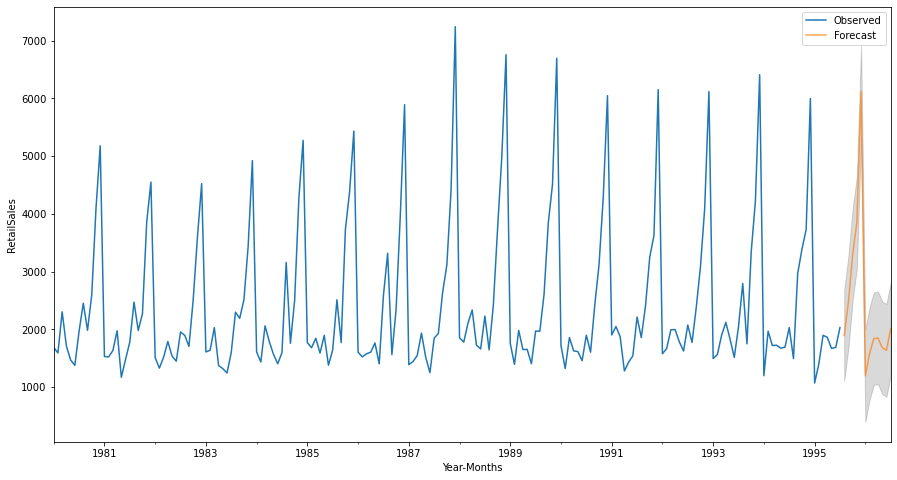

In [237]:
# plot the forecast along with the confidence band

axis = df1['Sparkling'].plot(label='Observed')
pred_full_manual_date_1['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_date_1.index, pred_full_manual_date_1['mean_ci_lower'], 
                  pred_full_manual_date_1['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

## SARIMA_Manual(2,1,2)(3,1,3,6) on whole data

In [225]:
full_data_model_2 = sm.tsa.statespace.SARIMAX(df1['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(3,1,3,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_2 = full_data_model_2.fit(maxiter=1000)
print(results_full_data_model_2.summary())

C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\siva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                         SARIMAX Results                                         
Dep. Variable:                                 Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(3, 1, [1, 2, 3], 6)   Log Likelihood               -1173.290
Date:                                   Sun, 13 Feb 2022   AIC                           2368.581
Time:                                           01:46:30   BIC                           2402.339
Sample:                                       01-01-1980   HQIC                          2382.290
                                            - 07-01-1995                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6667      0.354     -1.884      0.060    

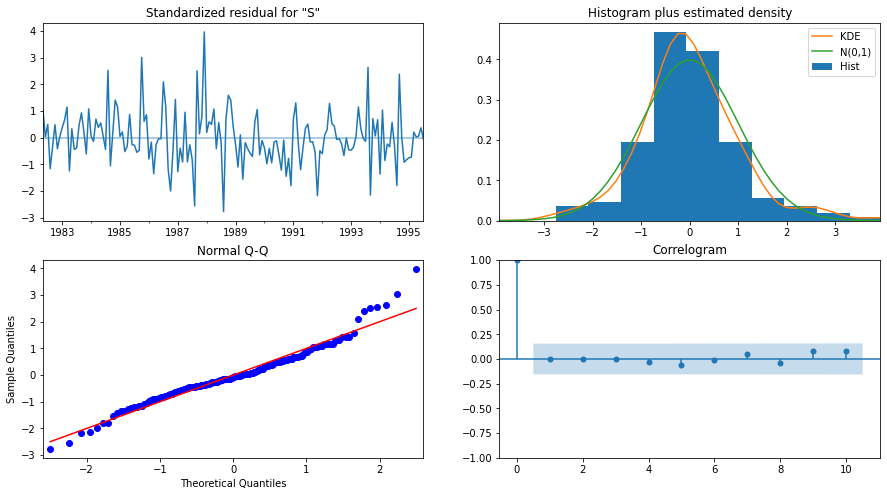

In [226]:
results_full_data_model_2.plot_diagnostics();

## Evaluate the model on the whole and predict 12 months into the future

In [210]:
df1['Sparkling'].tail()

YearMonth
1995-03-01    1897
1995-04-01    1862
1995-05-01    1670
1995-06-01    1688
1995-07-01    2031
Name: Sparkling, dtype: int64

In [227]:
predicted_manual_full_data_2 = results_full_data_model_2.get_forecast(steps=12)

In [228]:
predicted_manual_full_data_2.summary_frame(alpha=0.05)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1933.030434  384.137271    1180.135217    2685.925651
1995-09-01  2427.744301  389.188947    1664.947983    3190.540620
1995-10-01  3303.395894  389.262921    2540.454588    4066.337200
1995-11-01  3963.261014  390.530703    3197.834902    4728.687126
1995-12-01  6178.396097  390.548594    5412.934919    6943.857275
1996-01-01  1222.057941  391.233656     455.254065    1988.861817
1996-02-01  1630.300890  391.766617     862.452431    2398.149350
1996-03-01  1794.976573  392.320774    1026.041985    2563.911161
1996-04-01  1804.392398  392.509850    1035.087228    2573.697568
1996-05-01  1670.631314  392.920855     900.520590    2440.742039
1996-06-01  1604.495023  393.166748     833.902356    2375.087689
1996-07-01  2043.484424  393.523418    1272.192699    2814.776150

In [229]:
rmse = mean_squared_error(df1['Sparkling'],results_full_data_model_2.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 573.7177149373391


In [233]:
pred_full_manual_date_2 = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

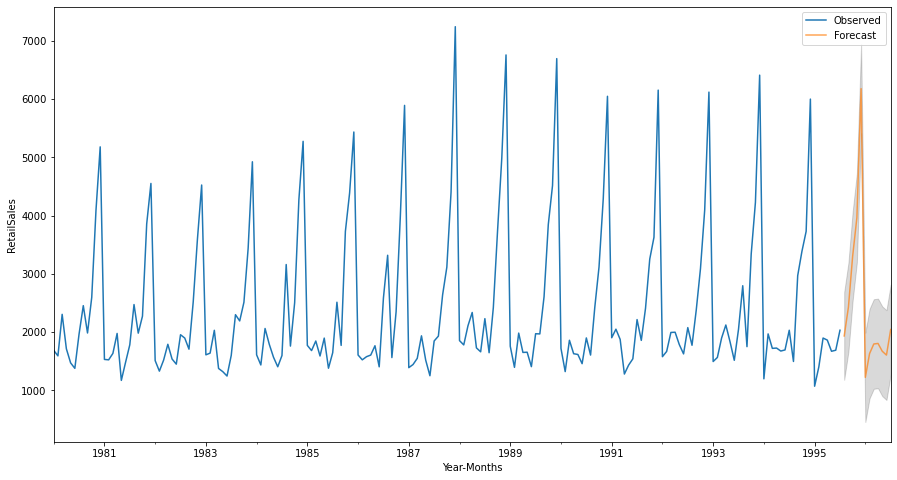

In [234]:
# plot the forecast along with the confidence band

axis = df1['Sparkling'].plot(label='Observed')
pred_full_manual_date_2['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_date_2.index, pred_full_manual_date_2['mean_ci_lower'], 
                  pred_full_manual_date_2['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()